In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from datetime import datetime
from sklearn.preprocessing import StandardScaler

In [12]:
# Load the data
df = pd.read_csv(r'C:\Users\34651\Desktop\MASTER\TFM\idealista18\Madrid_Sale.csv')
df

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,...,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,geometry
A15019136831406238029,201803,126000.0,2680.851064,47,1,1,0,1,1,3,...,0,1,0,8.058429,0.872075,6.868677,-3.766933,40.362485,c(-3.76693282740492,40.3624847687389)
A6677225905472065344,201803,235000.0,4351.851852,54,1,1,0,0,0,3,...,0,0,1,0.876369,0.116382,1.544125,-3.710725,40.422430,c(-3.71072465730388,40.4224298907482)
A13341979748618524775,201803,373000.0,4973.333333,75,2,1,0,0,1,3,...,0,0,1,0.907479,0.139109,1.608444,-3.711571,40.422190,c(-3.711570866261,40.4221904507903)
A4775182175615276542,201803,284000.0,5916.666667,48,1,1,0,1,1,3,...,0,0,1,0.845462,0.144299,1.516166,-3.710440,40.422251,c(-3.71043986942694,40.4222514604856)
A2492087730711701973,201803,228000.0,4560.000000,50,0,1,0,0,0,3,...,0,0,1,1.250231,0.337098,1.794136,-3.714340,40.408741,c(-3.71434022421324,40.4087408924555)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A3962186799478940177,201812,347000.0,3017.391304,115,3,2,1,1,1,3,...,0,0,1,10.003059,0.866826,8.276950,-3.592154,40.445810,c(-3.59215415596941,40.4458098008725)
A3876164367053781729,201812,311000.0,3344.086022,93,2,2,0,1,1,3,...,0,0,1,10.198147,1.019788,8.496364,-3.589376,40.445013,c(-3.58937606020609,40.4450131853889)
A17768295786772492698,201803,342000.0,2826.446281,121,2,2,1,1,1,2,...,0,0,1,11.204027,1.883650,9.573127,-3.576271,40.443196,c(-3.57627149326686,40.4431963663667)
A15733144649359668635,201806,146000.0,2354.838710,62,3,1,0,0,0,2,...,0,0,1,8.780692,0.171736,6.941217,-3.608694,40.447931,c(-3.60869398447231,40.4479311037453)


In [14]:
df.columns

Index(['ASSETID', 'PERIOD', 'PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA',
       'ROOMNUMBER', 'BATHNUMBER', 'HASTERRACE', 'HASLIFT',
       'HASAIRCONDITIONING', 'AMENITYID', 'HASPARKINGSPACE',
       'ISPARKINGSPACEINCLUDEDINPRICE', 'PARKINGSPACEPRICE',
       'HASNORTHORIENTATION', 'HASSOUTHORIENTATION', 'HASEASTORIENTATION',
       'HASWESTORIENTATION', 'HASBOXROOM', 'HASWARDROBE', 'HASSWIMMINGPOOL',
       'HASDOORMAN', 'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR',
       'CONSTRUCTIONYEAR', 'FLOORCLEAN', 'FLATLOCATIONID',
       'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT',
       'CADASTRALQUALITYID', 'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3',
       'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO',
       'DISTANCE_TO_CASTELLANA', 'LONGITUDE', 'LATITUDE', 'geometry'],
      dtype='object')

In [16]:
# Reset the index and convert it into a normal column
df_reset = df.reset_index()

# This adds the original index as a new column called "index"
# If you don't want to keep this new column, you can remove it with 'drop=True'
df_reset = df.reset_index(drop=True)

# View the DataFrame with the normal index
df_reset.head()


,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,...,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,geometry
0,201803,126000.0,2680.851064,47,1,1,0,1,1,3,...,0,1,0,8.058429,0.872075,6.868677,-3.766933,40.362485,c(-3.76693282740492,40.3624847687389)
1,201803,235000.0,4351.851852,54,1,1,0,0,0,3,...,0,0,1,0.876369,0.116382,1.544125,-3.710725,40.422430,c(-3.71072465730388,40.4224298907482)
2,201803,373000.0,4973.333333,75,2,1,0,0,1,3,...,0,0,1,0.907479,0.139109,1.608444,-3.711571,40.422190,c(-3.711570866261,40.4221904507903)
3,201803,284000.0,5916.666667,48,1,1,0,1,1,3,...,0,0,1,0.845462,0.144299,1.516166,-3.710440,40.422251,c(-3.71043986942694,40.4222514604856)
4,201803,228000.0,4560.000000,50,0,1,0,0,0,3,...,0,0,1,1.250231,0.337098,1.794136,-3.714340,40.408741,c(-3.71434022421324,40.4087408924555)


In [20]:
# Change de name of the columns. I need to shift them to the left and insert the column name LATITUDE
# Asign the column names manually.
new_columns = ['PERIOD', 'PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA', 'ROOMNUMBER', 
               'BATHNUMBER', 'HASTERRACE', 'HASLIFT', 'HASAIRCONDITIONING', 'AMENITYID', 
               'HASPARKINGSPACE', 'ISPARKINGSPACEINCLUDEDINPRICE', 'PARKINGSPACEPRICE', 
               'HASNORTHORIENTATION', 'HASSOUTHORIENTATION', 'HASEASTORIENTATION', 
               'HASWESTORIENTATION', 'HASBOXROOM', 'HASWARDROBE', 'HASSWIMMINGPOOL', 
               'HASDOORMAN', 'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR', 
               'CONSTRUCTIONYEAR', 'FLOORCLEAN', 'FLATLOCATIONID', 'CADCONSTRUCTIONYEAR', 
               'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT', 'CADASTRALQUALITYID', 
               'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3', 'DISTANCE_TO_CITY_CENTER', 
               'DISTANCE_TO_METRO', 'DISTANCE_TO_CASTELLANA', 'LONGITUDE','LATITUDE', 'geometry_longitude', 'geometry_latitude']

df_reset.columns = new_columns

df_reset.head()

,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,...,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,geometry_longitude,geometry_latitude
0,201803,126000.0,2680.851064,47,1,1,0,1,1,3,...,0,1,0,8.058429,0.872075,6.868677,-3.766933,40.362485,c(-3.76693282740492,40.3624847687389)
1,201803,235000.0,4351.851852,54,1,1,0,0,0,3,...,0,0,1,0.876369,0.116382,1.544125,-3.710725,40.422430,c(-3.71072465730388,40.4224298907482)
2,201803,373000.0,4973.333333,75,2,1,0,0,1,3,...,0,0,1,0.907479,0.139109,1.608444,-3.711571,40.422190,c(-3.711570866261,40.4221904507903)
3,201803,284000.0,5916.666667,48,1,1,0,1,1,3,...,0,0,1,0.845462,0.144299,1.516166,-3.710440,40.422251,c(-3.71043986942694,40.4222514604856)
4,201803,228000.0,4560.000000,50,0,1,0,0,0,3,...,0,0,1,1.250231,0.337098,1.794136,-3.714340,40.408741,c(-3.71434022421324,40.4087408924555)


In [22]:
# Create a new column combining the values of the two last columns
df_reset['GEOMETRY'] = df_reset.iloc[:, -2].astype(str) + " " + df_reset.iloc[:, -1].astype(str)
df_reset.head()

,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,...,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,geometry_longitude,geometry_latitude,GEOMETRY
0,201803,126000.0,2680.851064,47,1,1,0,1,1,3,...,1,0,8.058429,0.872075,6.868677,-3.766933,40.362485,c(-3.76693282740492,40.3624847687389),c(-3.76693282740492 40.3624847687389)
1,201803,235000.0,4351.851852,54,1,1,0,0,0,3,...,0,1,0.876369,0.116382,1.544125,-3.710725,40.422430,c(-3.71072465730388,40.4224298907482),c(-3.71072465730388 40.4224298907482)
2,201803,373000.0,4973.333333,75,2,1,0,0,1,3,...,0,1,0.907479,0.139109,1.608444,-3.711571,40.422190,c(-3.711570866261,40.4221904507903),c(-3.711570866261 40.4221904507903)
3,201803,284000.0,5916.666667,48,1,1,0,1,1,3,...,0,1,0.845462,0.144299,1.516166,-3.710440,40.422251,c(-3.71043986942694,40.4222514604856),c(-3.71043986942694 40.4222514604856)
4,201803,228000.0,4560.000000,50,0,1,0,0,0,3,...,0,1,1.250231,0.337098,1.794136,-3.714340,40.408741,c(-3.71434022421324,40.4087408924555),c(-3.71434022421324 40.4087408924555)


In [24]:
df_reset.columns

Index(['PERIOD', 'PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA', 'ROOMNUMBER',
       'BATHNUMBER', 'HASTERRACE', 'HASLIFT', 'HASAIRCONDITIONING',
       'AMENITYID', 'HASPARKINGSPACE', 'ISPARKINGSPACEINCLUDEDINPRICE',
       'PARKINGSPACEPRICE', 'HASNORTHORIENTATION', 'HASSOUTHORIENTATION',
       'HASEASTORIENTATION', 'HASWESTORIENTATION', 'HASBOXROOM', 'HASWARDROBE',
       'HASSWIMMINGPOOL', 'HASDOORMAN', 'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO',
       'ISINTOPFLOOR', 'CONSTRUCTIONYEAR', 'FLOORCLEAN', 'FLATLOCATIONID',
       'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT',
       'CADASTRALQUALITYID', 'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3',
       'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO',
       'DISTANCE_TO_CASTELLANA', 'LONGITUDE', 'LATITUDE', 'geometry_longitude',
       'geometry_latitude', 'GEOMETRY'],
      dtype='object')

In [26]:
# Clean the columns names
df_reset.columns = df_reset.columns.str.strip()

# Verify the columns names
print(df_reset.columns)

Index(['PERIOD', 'PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA', 'ROOMNUMBER',
       'BATHNUMBER', 'HASTERRACE', 'HASLIFT', 'HASAIRCONDITIONING',
       'AMENITYID', 'HASPARKINGSPACE', 'ISPARKINGSPACEINCLUDEDINPRICE',
       'PARKINGSPACEPRICE', 'HASNORTHORIENTATION', 'HASSOUTHORIENTATION',
       'HASEASTORIENTATION', 'HASWESTORIENTATION', 'HASBOXROOM', 'HASWARDROBE',
       'HASSWIMMINGPOOL', 'HASDOORMAN', 'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO',
       'ISINTOPFLOOR', 'CONSTRUCTIONYEAR', 'FLOORCLEAN', 'FLATLOCATIONID',
       'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT',
       'CADASTRALQUALITYID', 'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3',
       'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO',
       'DISTANCE_TO_CASTELLANA', 'LONGITUDE', 'LATITUDE', 'geometry_longitude',
       'geometry_latitude', 'GEOMETRY'],
      dtype='object')


In [28]:
# Now, delete some columns that are not needed
df_new = df_reset.drop(['geometry_longitude',
       'geometry_latitude'], axis=1)

# Verify the deletion
df_new.head()

,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,...,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,GEOMETRY
0,201803,126000.0,2680.851064,47,1,1,0,1,1,3,...,3.0,0,1,0,8.058429,0.872075,6.868677,-3.766933,40.362485,c(-3.76693282740492 40.3624847687389)
1,201803,235000.0,4351.851852,54,1,1,0,0,0,3,...,3.0,0,0,1,0.876369,0.116382,1.544125,-3.710725,40.422430,c(-3.71072465730388 40.4224298907482)
2,201803,373000.0,4973.333333,75,2,1,0,0,1,3,...,3.0,0,0,1,0.907479,0.139109,1.608444,-3.711571,40.422190,c(-3.711570866261 40.4221904507903)
3,201803,284000.0,5916.666667,48,1,1,0,1,1,3,...,5.0,0,0,1,0.845462,0.144299,1.516166,-3.710440,40.422251,c(-3.71043986942694 40.4222514604856)
4,201803,228000.0,4560.000000,50,0,1,0,0,0,3,...,7.0,0,0,1,1.250231,0.337098,1.794136,-3.714340,40.408741,c(-3.71434022421324 40.4087408924555)


In [30]:
# First description of the data (check the null values and the type of data in each column)
print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94815 entries, 0 to 94814
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PERIOD                         94815 non-null  int64  
 1   PRICE                          94815 non-null  float64
 2   UNITPRICE                      94815 non-null  float64
 3   CONSTRUCTEDAREA                94815 non-null  int64  
 4   ROOMNUMBER                     94815 non-null  int64  
 5   BATHNUMBER                     94815 non-null  int64  
 6   HASTERRACE                     94815 non-null  int64  
 7   HASLIFT                        94815 non-null  int64  
 8   HASAIRCONDITIONING             94815 non-null  int64  
 9   AMENITYID                      94815 non-null  int64  
 10  HASPARKINGSPACE                94815 non-null  int64  
 11  ISPARKINGSPACEINCLUDEDINPRICE  94815 non-null  int64  
 12  PARKINGSPACEPRICE              94815 non-null 

In [32]:
# Second description of the data (only for numerical features)
print(df_new.describe())

              PERIOD         PRICE     UNITPRICE  CONSTRUCTEDAREA  \
count   94815.000000  9.481500e+04  94815.000000     94815.000000   
mean   201808.613289  3.961101e+05   3661.051534       101.397163   
std         3.684625  4.170744e+05   1700.499398        67.078259   
min    201803.000000  2.100000e+04    805.309735        21.000000   
25%    201806.000000  1.600000e+05   2240.000000        62.000000   
50%    201809.000000  2.620000e+05   3480.000000        83.000000   
75%    201812.000000  4.670000e+05   4744.623034       117.000000   
max    201812.000000  8.133000e+06   9997.560976       985.000000   

         ROOMNUMBER    BATHNUMBER    HASTERRACE       HASLIFT  \
count  94815.000000  94815.000000  94815.000000  94815.000000   
mean       2.580900      1.585456      0.355260      0.695597   
std        1.244878      0.843024      0.478595      0.460157   
min        0.000000      0.000000      0.000000      0.000000   
25%        2.000000      1.000000      0.000000      

In [34]:
# Check if there are duplicate rows
print(df_new.duplicated().sum())

0


In [36]:
# Check NaN values
df_new.columns[df_new.isna().any()]

Index(['CONSTRUCTIONYEAR', 'FLOORCLEAN', 'FLATLOCATIONID',
       'CADASTRALQUALITYID'],
      dtype='object')

In [16]:
nan_columns = ['CONSTRUCTIONYEAR', 'FLOORCLEAN', 'FLATLOCATIONID',
       'CADASTRALQUALITYID']

# Show the quantity of rows with NaN values
df_new[['CONSTRUCTIONYEAR', 'FLOORCLEAN', 'FLATLOCATIONID',
       'CADASTRALQUALITYID']].isna().sum()

CONSTRUCTIONYEAR      55873
FLOORCLEAN             3846
FLATLOCATIONID         6387
CADASTRALQUALITYID        1
dtype: int64

In [44]:
# Compare the column CONSTRUCTIONYEAR with CADCONSTRUCTIONYEAR
df_new[['CONSTRUCTIONYEAR', 'CADCONSTRUCTIONYEAR']]

,CONSTRUCTIONYEAR,CADCONSTRUCTIONYEAR
0,2005.0,2005
1,NaN,1900
2,NaN,1915
3,NaN,1947
4,1930.0,1930
...,...,...
94810,NaN,2009
94811,2007.0,2007
94812,2005.0,2009
94813,1970.0,1970


In [48]:
# Check how many values of each column are the same
equal_values = (df_new['CONSTRUCTIONYEAR'] == df_new['CADCONSTRUCTIONYEAR']).sum()
print(f"Equal values: {equal_values}")

Equal values: 38464


In [50]:
# Show the 'FLATLOCATIONID' colum
df_new['FLATLOCATIONID']

0        1.0
1        2.0
2        1.0
3        2.0
4        1.0
        ... 
94810    1.0
94811    1.0
94812    1.0
94813    2.0
94814    1.0
Name: FLATLOCATIONID, Length: 94815, dtype: float64

In [52]:
# Remove the column 'CONTRUCTIONYEAR' and 'FLATLOCATIONID'
df_new = df_new.drop(['CONSTRUCTIONYEAR','FLATLOCATIONID'], axis = 1)

In [54]:
# Remove the NaN value of the column 'CADASTRALQUALITYID'
df_new = df_new[df_new['CADASTRALQUALITYID'].notna()]

In [56]:
# 1.- Group by 'CADMAXBUILDINGFLOOR' and calculate the average of 'FLOORCLEAN'
average_floorclean = df_new.groupby('CADMAXBUILDINGFLOOR')['FLOORCLEAN'].mean().round()

# 2.- Refill the NaN values of 'FLOORCLEAN' with the average corresponding to each 'CADMAXBUILDINGFLOOR'
df_new['FLOORCLEAN'] = df_new.apply(
    lambda row: average_floorclean[row['CADMAXBUILDINGFLOOR']] 
        if pd.isna(row['FLOORCLEAN']) else row['FLOORCLEAN'],
    axis = 1
)

# Show the quantity of rows with NaN values
df_new[['FLOORCLEAN','CADASTRALQUALITYID']].isna().sum()

FLOORCLEAN            0
CADASTRALQUALITYID    0
dtype: int64

In [58]:
# Check the number of different classes in each column
print(df_new.nunique())

PERIOD                               4
PRICE                             2761
UNITPRICE                        31151
CONSTRUCTEDAREA                    558
ROOMNUMBER                          21
BATHNUMBER                          18
HASTERRACE                           2
HASLIFT                              2
HASAIRCONDITIONING                   2
AMENITYID                            3
HASPARKINGSPACE                      2
ISPARKINGSPACEINCLUDEDINPRICE        2
PARKINGSPACEPRICE                  146
HASNORTHORIENTATION                  2
HASSOUTHORIENTATION                  2
HASEASTORIENTATION                   2
HASWESTORIENTATION                   2
HASBOXROOM                           2
HASWARDROBE                          2
HASSWIMMINGPOOL                      2
HASDOORMAN                           2
HASGARDEN                            2
ISDUPLEX                             2
ISSTUDIO                             2
ISINTOPFLOOR                         2
FLOORCLEAN               

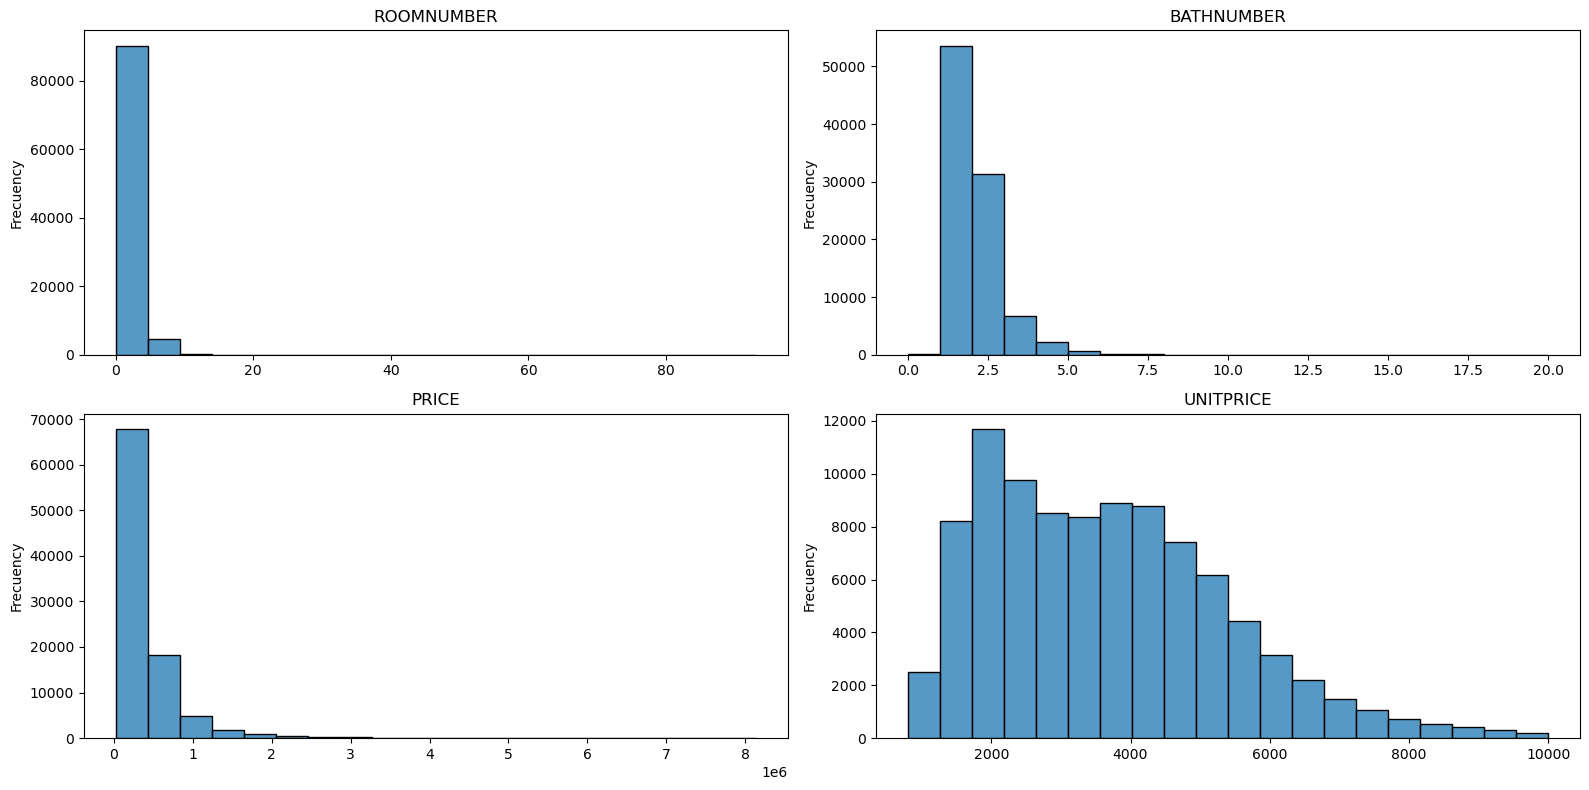

In [60]:
# Check the frecuencies of differents features in the dataset 

# Features that I want to show
columns = ['ROOMNUMBER', 'BATHNUMBER', 'PRICE', 'UNITPRICE']

#  Create the graph with 3 rows and 3 columns
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# Show each subplot
for i, col in enumerate(columns):
    column = i % 2
    row = i // 2
    sns.histplot(df_new[col], bins=20, ax=axes[row, column])
    axes[row, column].set_title(f'{col}')
    axes[row, column].set_xlabel('')
    axes[row, column].set_ylabel('Frecuency')
        
# Adjust the space between two subplots
plt.tight_layout()
plt.show()
plt.show()

In [62]:
df_filtered = df_new[(df_new['ROOMNUMBER'] < 20) &
                    (df_new['BATHNUMBER'] < 10) &
                    (df_new['PRICE'] < (4 * 10**6))]

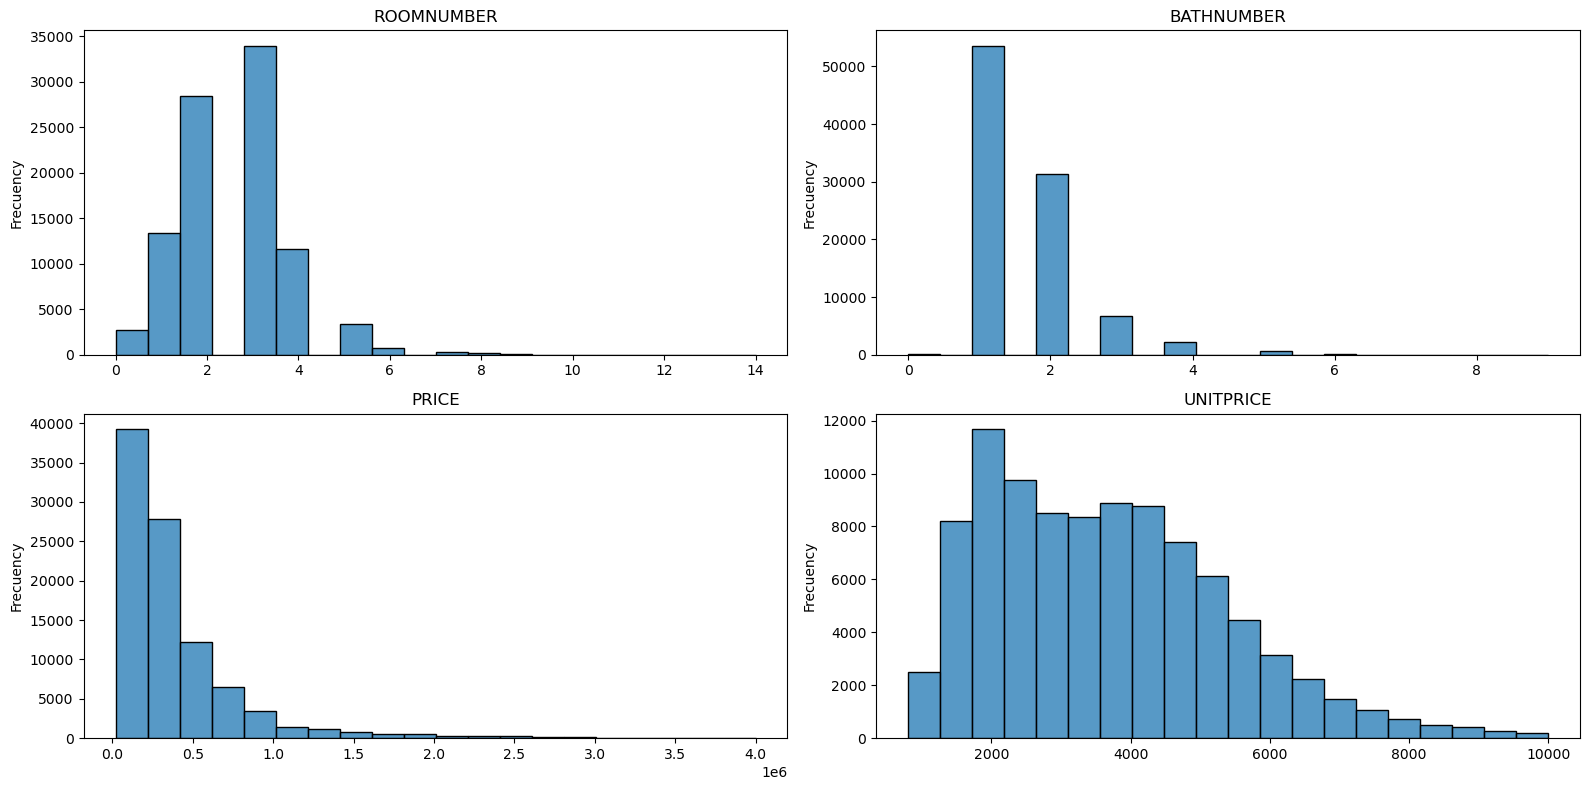

In [64]:
# Check the frecuencies of differents features in the dataset 

# Features that I want to show
columns = ['ROOMNUMBER', 'BATHNUMBER', 'PRICE', 'UNITPRICE']

#  Create the graph with 3 rows and 3 columns
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# Show each subplot
for i, col in enumerate(columns):
    column = i % 2
    row = i // 2
    sns.histplot(df_filtered[col], bins=20, ax=axes[row, column])
    axes[row, column].set_title(f'{col}')
    axes[row, column].set_xlabel('')
    axes[row, column].set_ylabel('Frecuency')
        
# Adjust the space between two subplots
plt.tight_layout()
plt.show()
plt.show()

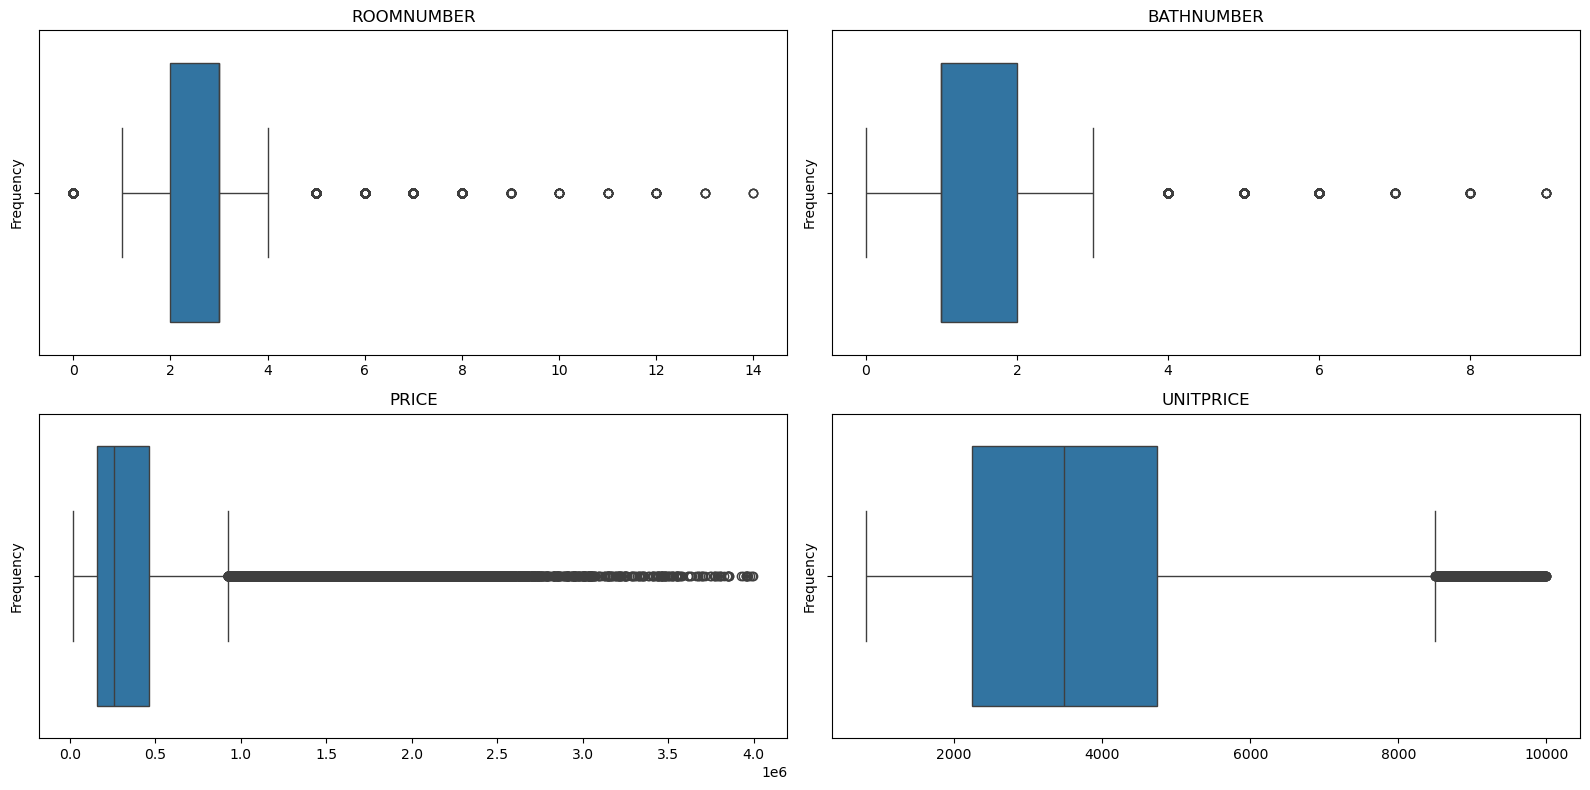

In [66]:
# Check the frequencies of different features in the dataset

# Features that I want to show
columns = ['ROOMNUMBER', 'BATHNUMBER', 'PRICE', 'UNITPRICE']

# Create the graph with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# Show each subplot
for i, col in enumerate(columns):
    column = i % 2
    row = i // 2
    sns.boxplot(data=df_filtered, x=col, ax=axes[row, column])
    axes[row, column].set_title(f'{col}')
    axes[row, column].set_xlabel('')
    axes[row, column].set_ylabel('Frequency')

# Adjust the space between two subplots
plt.tight_layout()
plt.show()


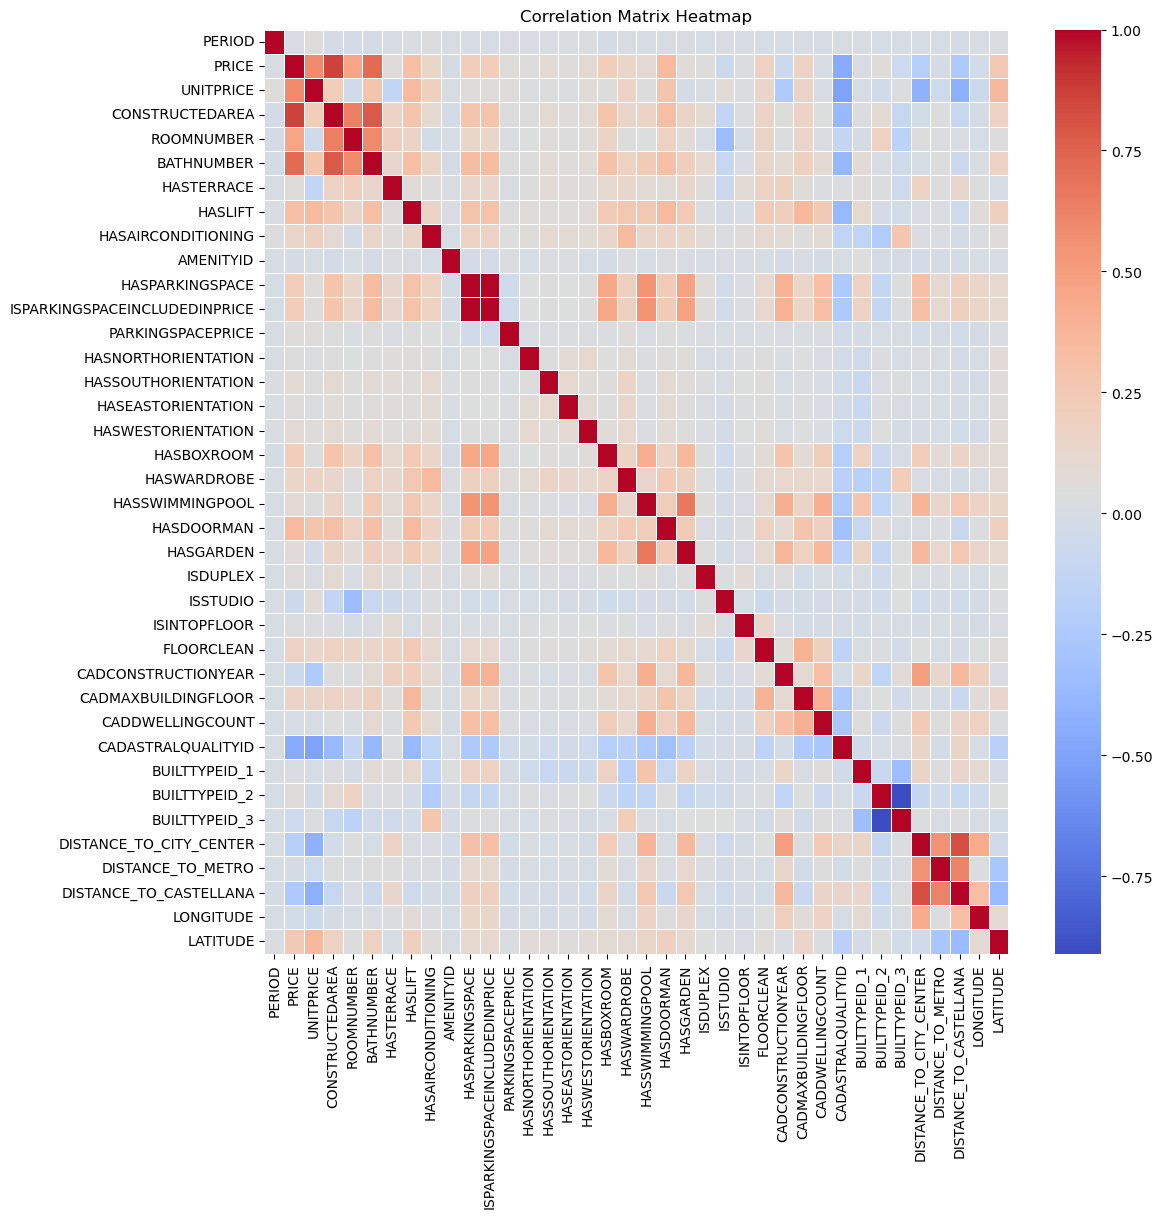

In [68]:
# Correlation heatmap
correlation_matrix = (df_new.iloc[:, :-1]).corr()

plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.show()

In [70]:
# Let's check how evolves the Constructed Area as a function of differents features

# Number of bathrooms
bathrooms_constructed_area = df_new.groupby('BATHNUMBER')['CONSTRUCTEDAREA'].mean()

# Number of rooms
rooms_constructed_area = df_new.groupby('ROOMNUMBER')['CONSTRUCTEDAREA'].mean()

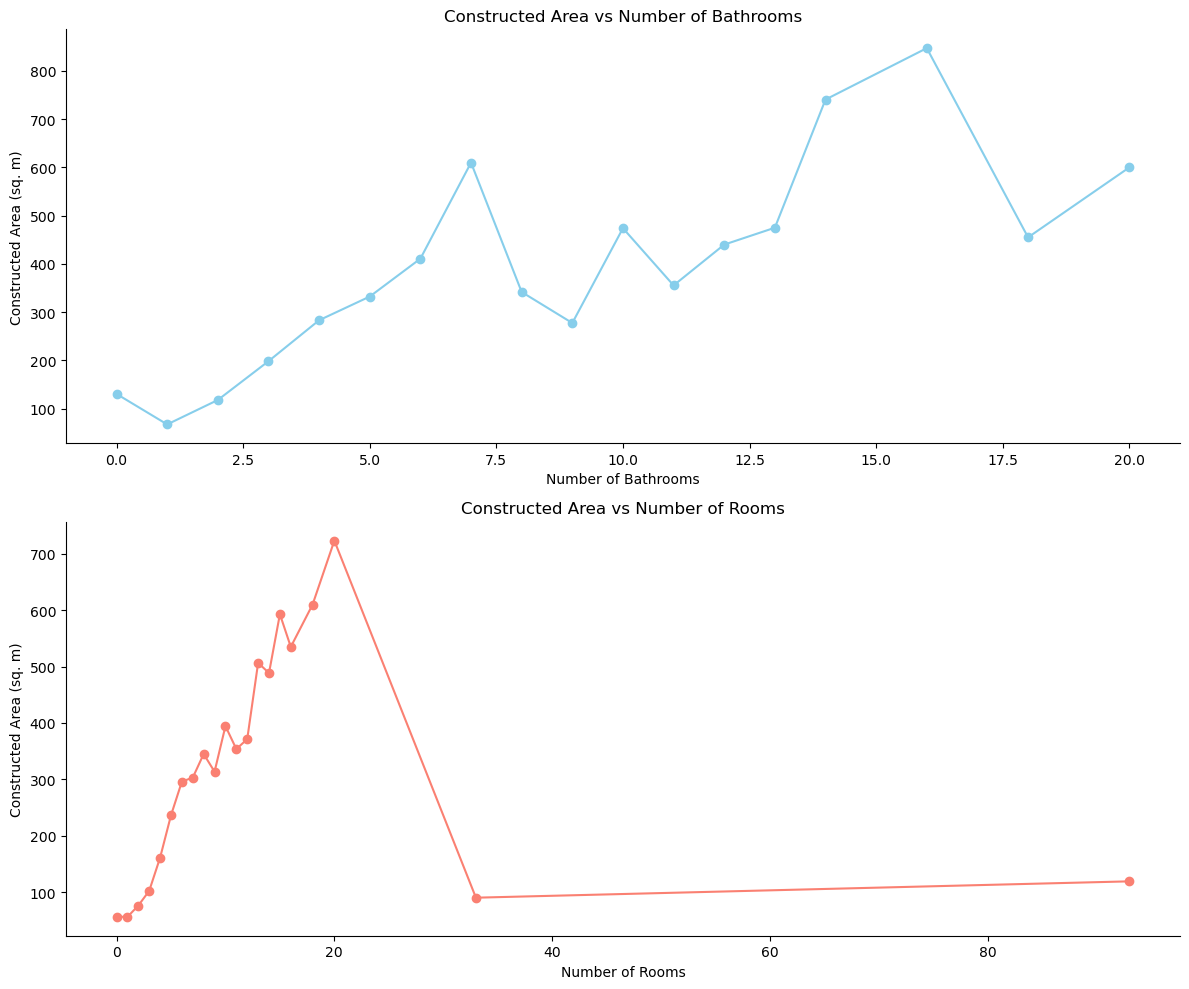

In [72]:
import matplotlib.pyplot as plt

# Create a figure with custom grid layout (2 rows and 2 columns)
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(2, 1, height_ratios = [1, 1])

# First subplot: Number of Bathrooms vs Constructed Area (top)
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(bathrooms_constructed_area.index,
         bathrooms_constructed_area.values, marker='o', color='skyblue')
ax1.set_title('Constructed Area vs Number of Bathrooms')
ax1.set_xlabel('Number of Bathrooms')
ax1.set_ylabel('Constructed Area (sq. m)')
ax1.spines['right'].set_visible(False)  # Hide the right spine
ax1.spines['top'].set_visible(False)  # Hide the top spine

# Second subplot: Number of Rooms vs Constructed Area (bottom)
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(rooms_constructed_area.index, rooms_constructed_area.values, marker='o', color='salmon')
ax2.set_title('Constructed Area vs Number of Rooms')
ax2.set_xlabel('Number of Rooms')
ax2.set_ylabel('Constructed Area (sq. m)')
ax2.spines['right'].set_visible(False)  # Hide the right spine
ax2.spines['top'].set_visible(False)  # Hide the top spine

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


In [74]:
# Let's check how evolves the Price as a function of differents features

# Number of bathrooms
bathrooms_price = df_new.groupby('BATHNUMBER')['PRICE'].mean()

# Number of rooms
rooms_price = df_new.groupby('ROOMNUMBER')['PRICE'].mean()

# Size
size_price = df_new.groupby('CONSTRUCTEDAREA')['PRICE'].mean()

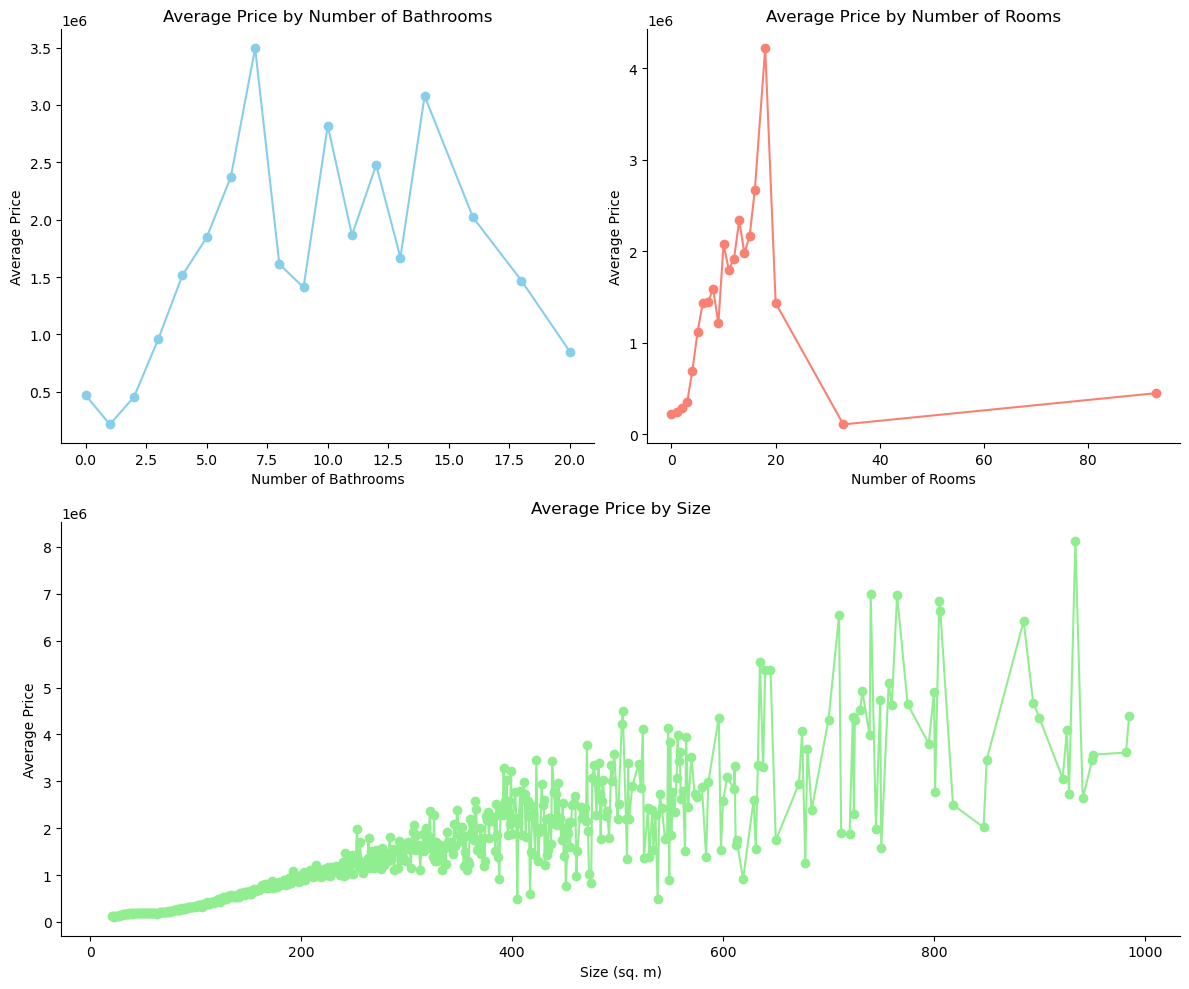

In [76]:
import matplotlib.pyplot as plt

# Create a figure with custom grid layout (2 rows and 2 columns)
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(2, 2)

# First subplot: Number of Bathrooms vs Price (top-left)
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(bathrooms_price.index, bathrooms_price.values, marker='o', color='skyblue')
ax1.set_title('Average Price by Number of Bathrooms')
ax1.set_xlabel('Number of Bathrooms')
ax1.set_ylabel('Average Price')
ax1.spines['right'].set_visible(False)  # Hide the right spine
ax1.spines['top'].set_visible(False)  # Hide the top spine

# Second subplot: Number of Rooms vs Price (top-right)
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(rooms_price.index, rooms_price.values, marker='o', color='salmon')
ax2.set_title('Average Price by Number of Rooms')
ax2.set_xlabel('Number of Rooms')
ax2.set_ylabel('Average Price')
ax2.spines['right'].set_visible(False)  # Hide the right spine
ax2.spines['top'].set_visible(False)  # Hide the top spine

# Third subplot: Size vs Price (bottom-left, stretched to span two columns)
ax3 = fig.add_subplot(gs[1, 0:])
ax3.plot(size_price.index, size_price.values, marker='o', color='lightgreen')
ax3.set_title('Average Price by Size')
ax3.set_xlabel('Size (sq. m)')
ax3.set_ylabel('Average Price')
ax3.spines['right'].set_visible(False)  # Hide the right spine
ax3.spines['top'].set_visible(False)  # Hide the top spine

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


In [78]:
condition = df_new["ROOMNUMBER"] >= 20


num_rows = condition.sum()
print(f"Number of properties with more than 20 rooms: {num_rows}")

print(df_new[df_new["ROOMNUMBER"] >= 20][["ROOMNUMBER", "PRICE"]])

# Average price for properties with 10 rooms
average_price_10_rooms = rooms_price.loc[10]
print(f"Average price for properties with 10 rooms: {average_price_10_rooms:.2f}")

Number of properties with more than 20 rooms: 4
       ROOMNUMBER      PRICE
544            20  2020000.0
17638          93   450000.0
68891          20   850000.0
84059          33   109000.0
Average price for properties with 10 rooms: 2079083.33


In [80]:
# Count of properties grouped by number of rooms
df_new.groupby("ROOMNUMBER").size().reset_index(name="Number of Properties")

,ROOMNUMBER,Number of Properties
0,0,2745
1,1,13338
2,2,28421
3,3,33961
4,4,11674
5,5,3350
6,6,789
7,7,279
8,8,142
9,9,35


In [82]:
# Take properties with fewer than 20 rooms. 
# We won't take into account those properties with 0 rooms, as it does not make anysense.
df_new2 = df_new[(df_new["ROOMNUMBER"] >= 1) & (df_new["ROOMNUMBER"] < 20)]

In [84]:
# Count of properties grouped by number of bathrooms
df_new.groupby("BATHNUMBER").size().reset_index(name="Number of Properties")

,BATHNUMBER,Number of Properties
0,0,89
1,1,53582
2,2,31352
3,3,6673
4,4,2132
5,5,722
6,6,159
7,7,39
8,8,28
9,9,7


In [86]:
# Take properties with 7 or fewer bathrooms
df_new3 = df_new2[df_new2["BATHNUMBER"] <= 7]
df_new3

,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,...,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,GEOMETRY
0,201803,126000.0,2680.851064,47,1,1,0,1,1,3,...,3.0,0,1,0,8.058429,0.872075,6.868677,-3.766933,40.362485,c(-3.76693282740492 40.3624847687389)
1,201803,235000.0,4351.851852,54,1,1,0,0,0,3,...,3.0,0,0,1,0.876369,0.116382,1.544125,-3.710725,40.422430,c(-3.71072465730388 40.4224298907482)
2,201803,373000.0,4973.333333,75,2,1,0,0,1,3,...,3.0,0,0,1,0.907479,0.139109,1.608444,-3.711571,40.422190,c(-3.711570866261 40.4221904507903)
3,201803,284000.0,5916.666667,48,1,1,0,1,1,3,...,5.0,0,0,1,0.845462,0.144299,1.516166,-3.710440,40.422251,c(-3.71043986942694 40.4222514604856)
5,201803,498000.0,3921.259843,127,3,2,0,1,0,3,...,3.0,0,1,0,0.541773,0.161436,1.168126,-3.707522,40.412639,c(-3.70752185145011 40.4126386908556)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94810,201812,347000.0,3017.391304,115,3,2,1,1,1,3,...,3.0,0,0,1,10.003059,0.866826,8.276950,-3.592154,40.445810,c(-3.59215415596941 40.4458098008725)
94811,201812,311000.0,3344.086022,93,2,2,0,1,1,3,...,3.0,0,0,1,10.198147,1.019788,8.496364,-3.589376,40.445013,c(-3.58937606020609 40.4450131853889)
94812,201803,342000.0,2826.446281,121,2,2,1,1,1,2,...,3.0,0,0,1,11.204027,1.883650,9.573127,-3.576271,40.443196,c(-3.57627149326686 40.4431963663667)
94813,201806,146000.0,2354.838710,62,3,1,0,0,0,2,...,5.0,0,0,1,8.780692,0.171736,6.941217,-3.608694,40.447931,c(-3.60869398447231 40.4479311037453)


In [92]:
# Before that, it seems there are two very similar columns: 'HASPARKINGSPACE' and 'ISPARKINGINCLUDEINPRICE'. Let's analyze whether 
# they are the same or not.

df_new3[['HASPARKINGSPACE','ISPARKINGSPACEINCLUDEDINPRICE']]

,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE
0,0,0
1,0,0
2,0,0
3,0,0
5,0,0
...,...,...
94810,1,1
94811,1,1
94812,1,1
94813,0,0


In [100]:
equal_values = (df_new3['HASPARKINGSPACE'] == df_new3['ISPARKINGSPACEINCLUDEDINPRICE']).sum()
print(f"Equal values: {equal_values}")

Equal values: 92001


In [104]:
# We can drop the colum 'HASPARKINGSPACE' because it is the same as 'ISPARKINGSPACEINCLUDEDINPRICE', it is duplicated.
df_new3 = df_new3.copy()  # Explicitly create a copy to avoid the warning
df_new3.drop(columns={'HASPARKINGSPACE'}, inplace=True)

KeyError: "['HASPARKINGSPACE'] not found in axis"

In [108]:
df_new3.columns

Index(['PERIOD', 'PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA', 'ROOMNUMBER',
       'BATHNUMBER', 'HASTERRACE', 'HASLIFT', 'HASAIRCONDITIONING',
       'AMENITYID', 'ISPARKINGSPACEINCLUDEDINPRICE', 'PARKINGSPACEPRICE',
       'HASNORTHORIENTATION', 'HASSOUTHORIENTATION', 'HASEASTORIENTATION',
       'HASWESTORIENTATION', 'HASBOXROOM', 'HASWARDROBE', 'HASSWIMMINGPOOL',
       'HASDOORMAN', 'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR',
       'FLOORCLEAN', 'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR',
       'CADDWELLINGCOUNT', 'CADASTRALQUALITYID', 'BUILTTYPEID_1',
       'BUILTTYPEID_2', 'BUILTTYPEID_3', 'DISTANCE_TO_CITY_CENTER',
       'DISTANCE_TO_METRO', 'DISTANCE_TO_CASTELLANA', 'LONGITUDE', 'LATITUDE',
       'GEOMETRY'],
      dtype='object')

In [110]:
# Let's check how evolves the Price as a function of differents features

# Swimming Pool
swimming_pool_price = df_new.groupby('HASSWIMMINGPOOL')['PRICE'].mean()

# Garden
garden_price = df_new.groupby('HASGARDEN')['PRICE'].mean()

# Terrace
terrace_price = df_new.groupby('HASTERRACE')['PRICE'].mean()

# Parking included in price
parking_price = df_new.groupby('ISPARKINGSPACEINCLUDEDINPRICE')['PRICE'].mean()

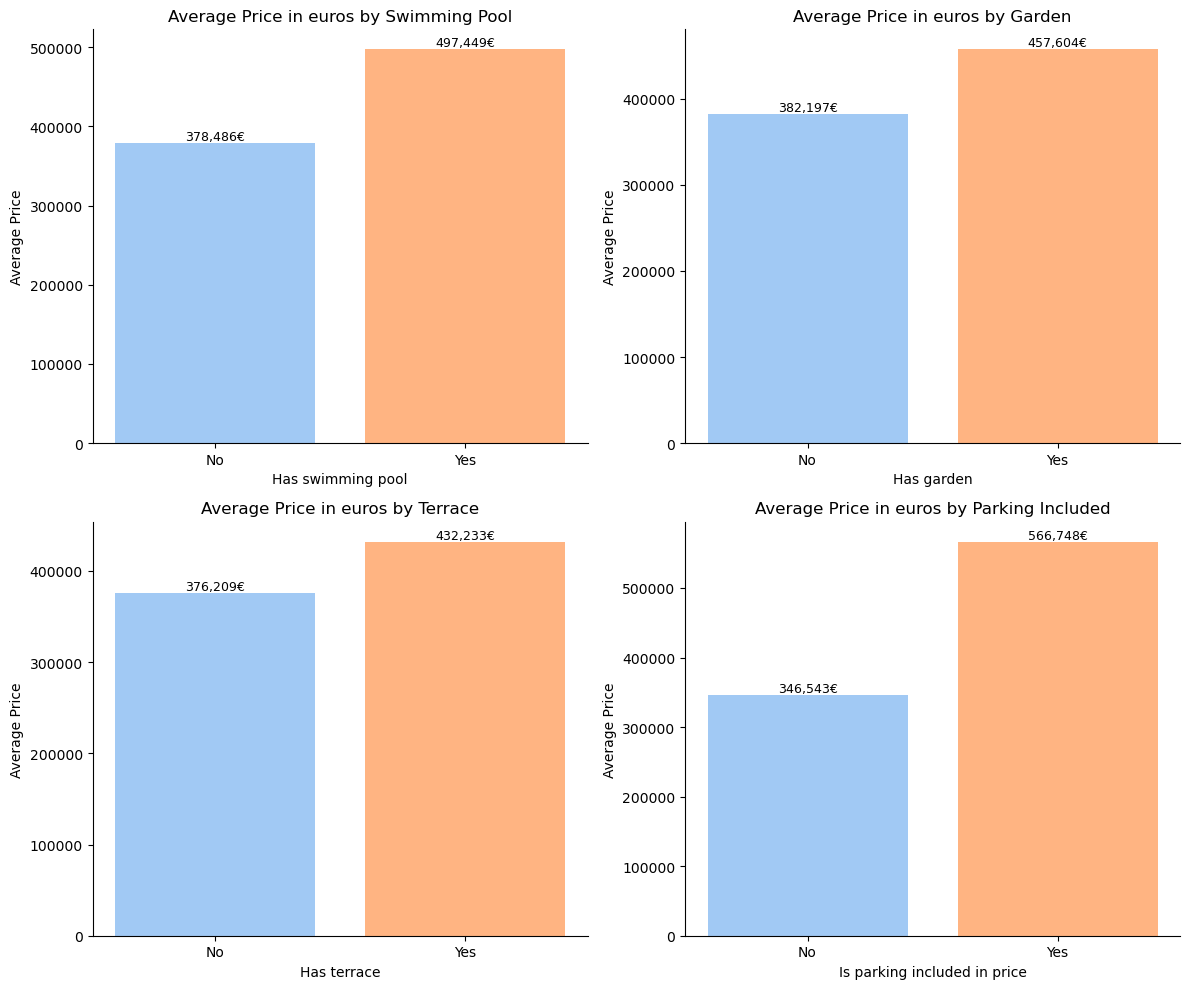

In [84]:
import matplotlib.pyplot as plt

# Create a figure with custom grid layout (2 rows and 2 columns)
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(2, 2)

# --- Helper function to annotate bars ---
def annotate_bars(ax, data):
    for i, value in enumerate(data.values):
        ax.text(i, value, f'{value:,.0f}€', ha='center', va='bottom', fontsize=9)

# Define colors: [No → #A1C9F4, Yes → #FFB482]
bar_colors = ['#A1C9F4', '#FFB482']

# First subplot: Has swimming pool vs Price (top-left)
ax1 = fig.add_subplot(gs[0, 0])
ax1.bar(swimming_pool_price.index, swimming_pool_price.values, color=bar_colors)
ax1.set_title('Average Price in euros by Swimming Pool')
ax1.set_xlabel('Has swimming pool')
ax1.set_ylabel('Average Price')
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['No', 'Yes'])
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
annotate_bars(ax1, swimming_pool_price)

# Second subplot: Has garden vs Price (top-right)
ax2 = fig.add_subplot(gs[0, 1])
ax2.bar(garden_price.index, garden_price.values, color=bar_colors)
ax2.set_title('Average Price in euros by Garden')
ax2.set_xlabel('Has garden')
ax2.set_ylabel('Average Price')
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['No', 'Yes'])
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
annotate_bars(ax2, garden_price)

# Third subplot: Has terrace vs Price (bottom-left)
ax3 = fig.add_subplot(gs[1, 0])
ax3.bar(terrace_price.index, terrace_price.values, color=bar_colors)
ax3.set_title('Average Price in euros by Terrace')
ax3.set_xlabel('Has terrace')
ax3.set_ylabel('Average Price')
ax3.set_xticks([0, 1])
ax3.set_xticklabels(['No', 'Yes'])
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
annotate_bars(ax3, terrace_price)

# Fourth subplot: Is parking space included in price vs Price (bottom-right)
ax4 = fig.add_subplot(gs[1, 1])
ax4.bar(parking_price.index, parking_price.values, color=bar_colors)
ax4.set_title('Average Price in euros by Parking Included')
ax4.set_xlabel('Is parking included in price')
ax4.set_ylabel('Average Price')
ax4.set_xticks([0, 1])
ax4.set_xticklabels(['No', 'Yes'])
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
annotate_bars(ax4, parking_price)

# Adjust layout
plt.tight_layout()
plt.show()


In [88]:
# Filter the properties with garden, terrace, swimming pool and parking included in the price.
mask = (
    (df_new['HASGARDEN'] == 1) & 
    (df_new['HASTERRACE'] == 1) & 
    (df_new['ISPARKINGSPACEINCLUDEDINPRICE'] == 1) & 
    (df_new['HASSWIMMINGPOOL'] == 1)
)

mask2 = (
    (df_new['HASGARDEN'] == 0) |
    (df_new['HASTERRACE'] == 0) |
    (df_new['ISPARKINGSPACEINCLUDEDINPRICE'] == 0) |
    (df_new['HASSWIMMINGPOOL'] == 0)
)

# Calculate the average price between those properties
average_price_luxury_houses = df_new.loc[mask, 'PRICE'].mean()

# Calculate the average price between non luxury properties
average_price_no_luxury_houses = df_new.loc[mask2, 'PRICE'].mean()

print(f"Average price for luxury properties: {average_price_luxury_houses} €")
print(f"Average price for non luxury properties: {average_price_no_luxury_houses} €")

Average price for luxury properties: 609531.4781021898 €
Average price for non luxury properties: 385765.55346676987 €


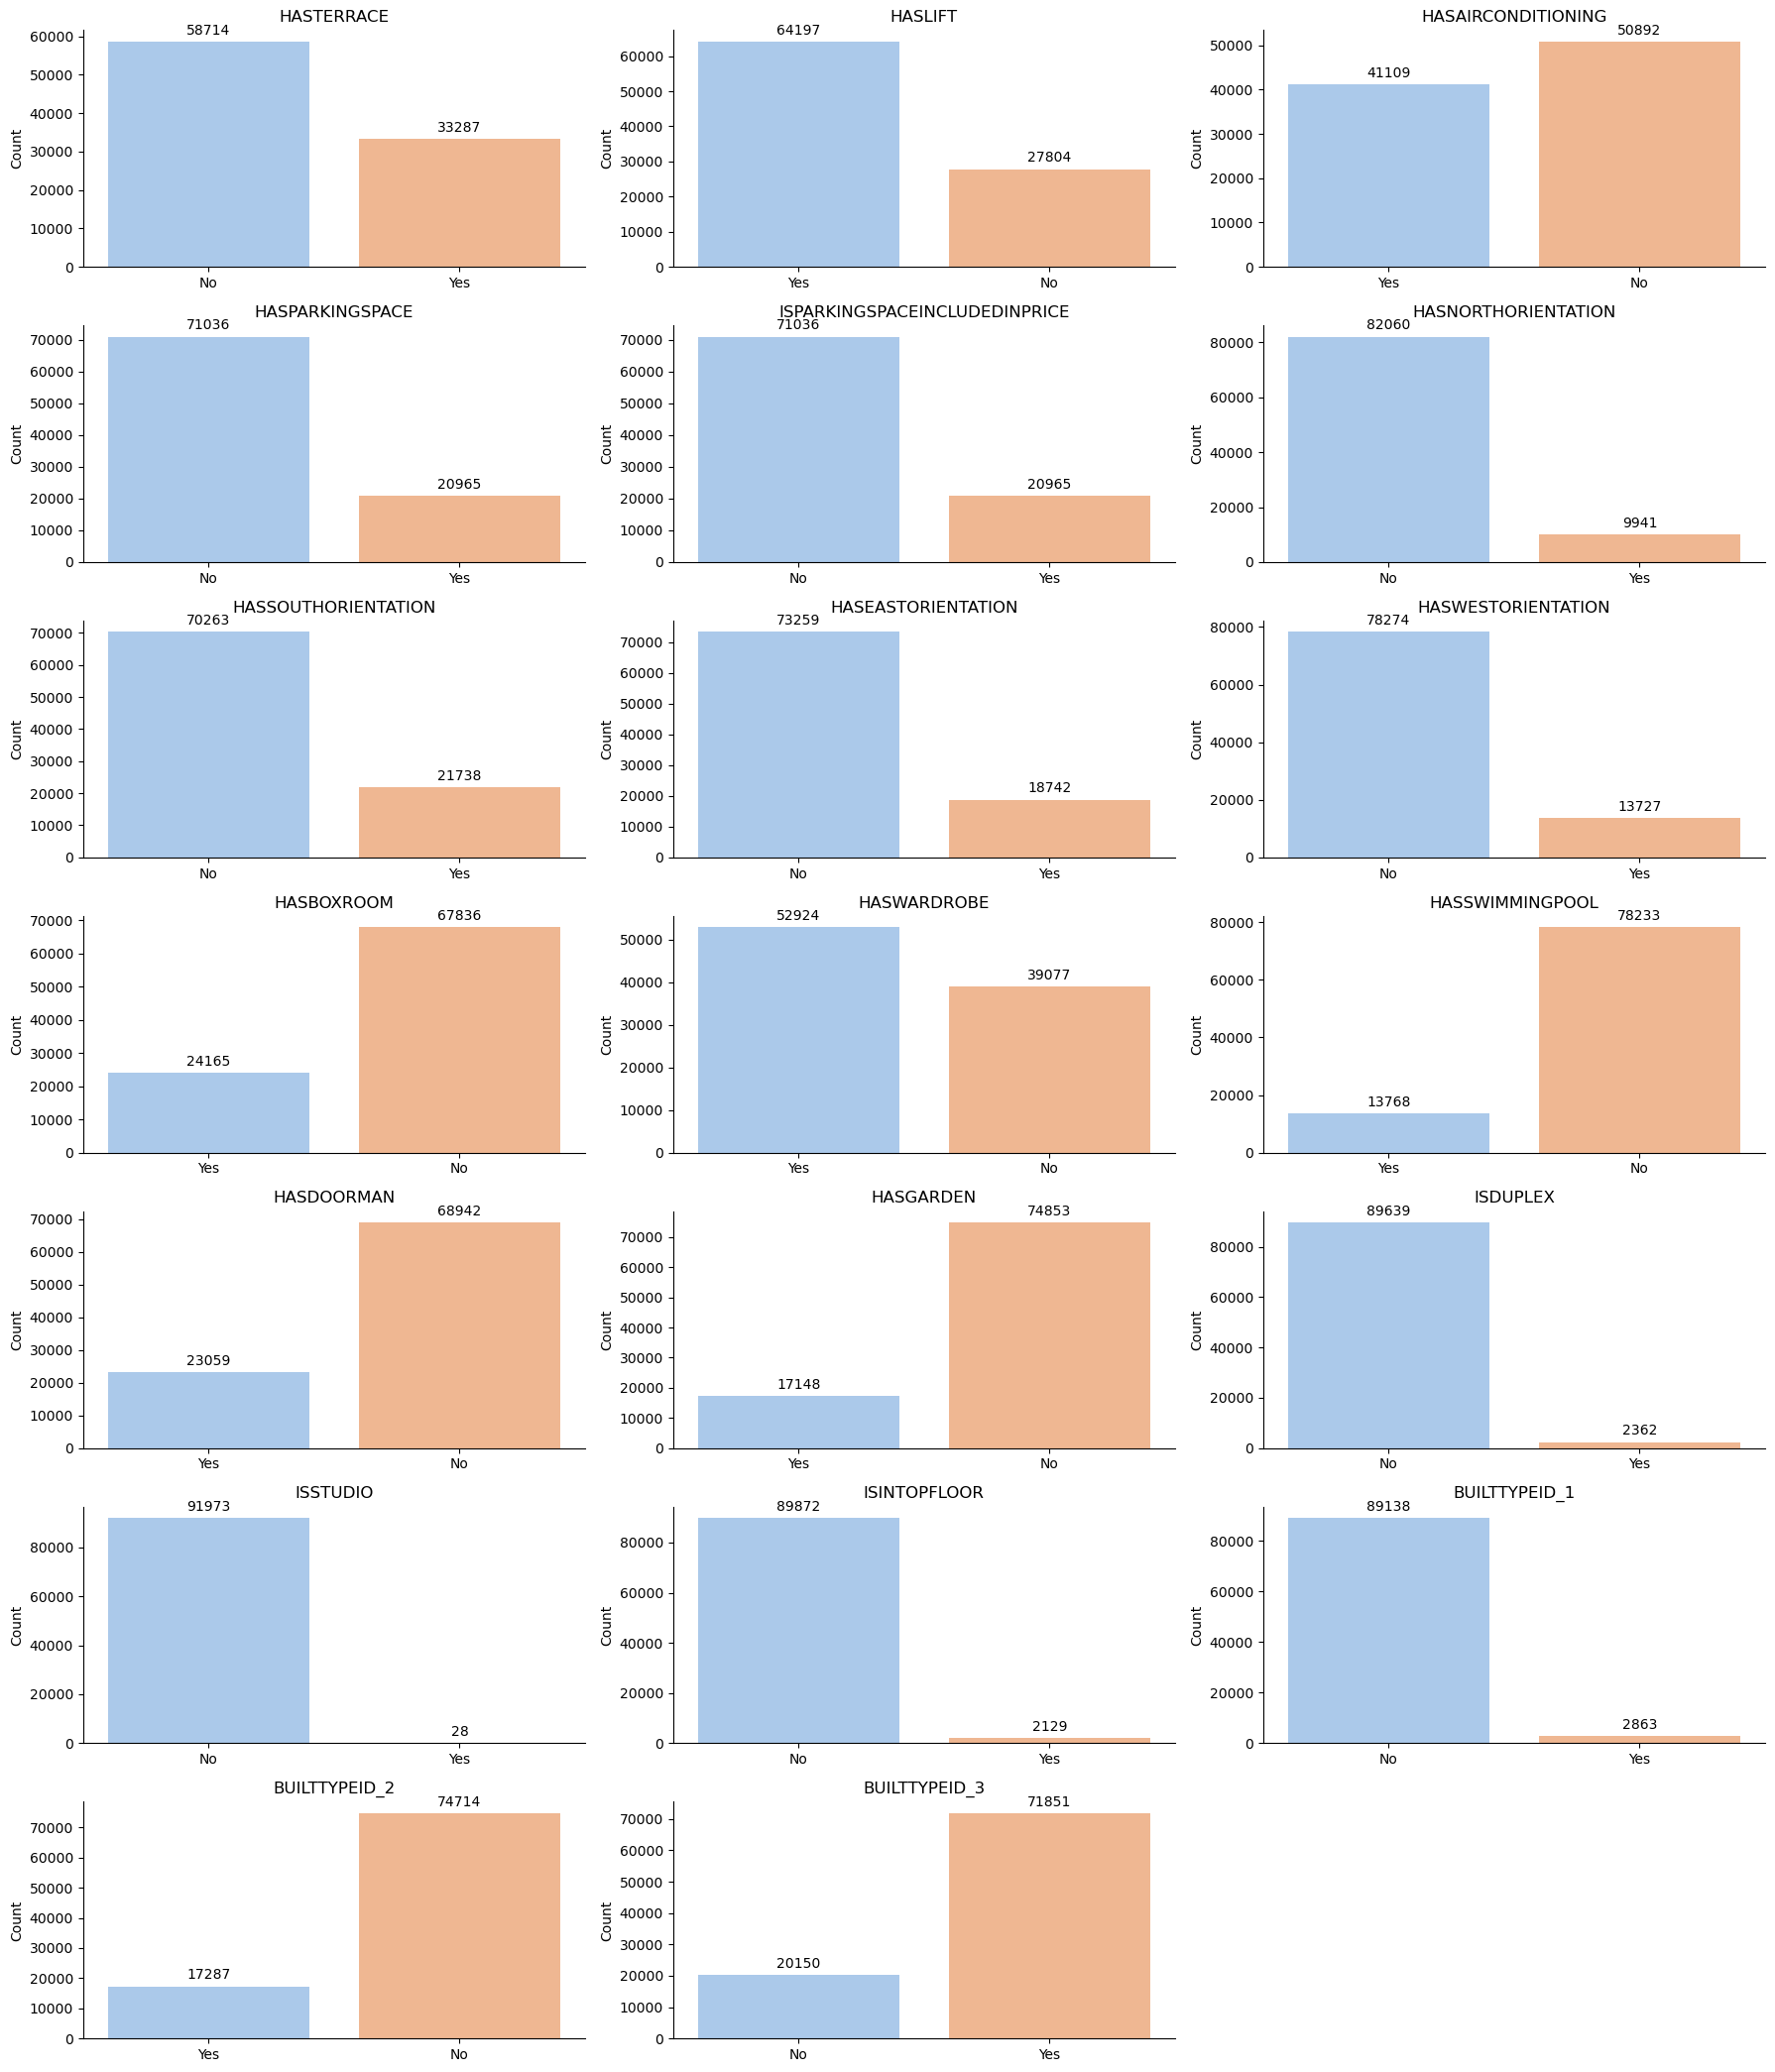

In [183]:
# Columns to show

columns = [
    'HASTERRACE', 'HASLIFT', 'HASAIRCONDITIONING',
    'ISPARKINGSPACEINCLUDEDINPRICE', 'HASNORTHORIENTATION', 'HASSOUTHORIENTATION',
    'HASEASTORIENTATION', 'HASWESTORIENTATION', 'HASBOXROOM', 'HASWARDROBE',
    'HASSWIMMINGPOOL', 'HASDOORMAN', 'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO',
    'ISINTOPFLOOR', 'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3'
]

# Map 0 -> No, 1 -> Yes

df_plot = df_new3.copy()
for col in columns:
    if df_plot[col].nunique() == 2:
        df_plot[col] = df_plot[col].map({0: "No", 1: "Yes"})

# Size of the figure
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 3))

axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(data = df_plot, x = col, ax = axes[i], hue = col, palette = "pastel", legend = False)
    sns.despine(ax = axes[i], top = True, right = True)
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%d', label_type='edge', padding=3)

# Ocultar los ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [112]:
# Orientation cols
orientation_cols = [
    'HASNORTHORIENTATION', 
    'HASSOUTHORIENTATION', 
    'HASEASTORIENTATION', 
    'HASWESTORIENTATION'
]

# Dictionary to save the average price of each orientation
mean_prices_by_orientation = {}

# Filter and calculate the average price by orientation
for col in orientation_cols:
    mean_price = df_new3[df_new3[col] == 1]["PRICE"].mean()
    mean_prices_by_orientation[col] = mean_price

# Show the results
for orientation, price in mean_prices_by_orientation.items():
    print(f"{orientation}: Average Price = {price:.2f}")

HASNORTHORIENTATION: Average Price = 456900.21
HASSOUTHORIENTATION: Average Price = 463849.62
HASEASTORIENTATION: Average Price = 444610.98
HASWESTORIENTATION: Average Price = 497392.73


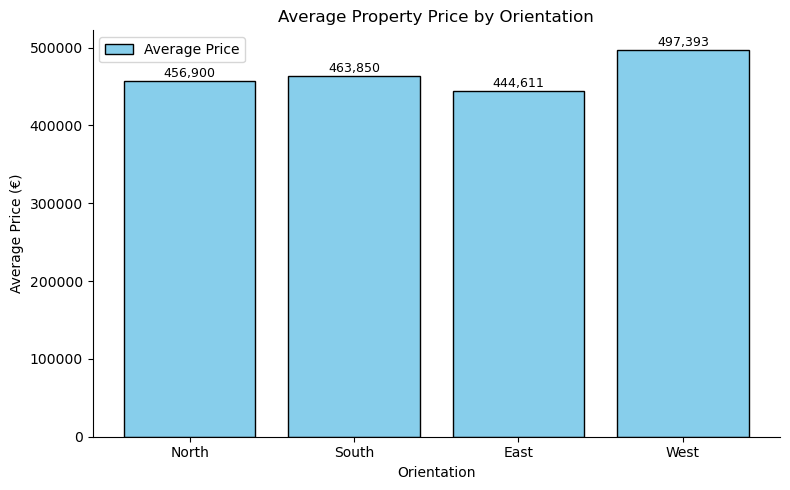

In [185]:
import matplotlib.pyplot as plt

# Rename the orientation columns
orientation_labels = {
    'HASNORTHORIENTATION': 'North',
    'HASSOUTHORIENTATION': 'South',
    'HASEASTORIENTATION': 'East',
    'HASWESTORIENTATION': 'West'
}

# Data
orientations = [orientation_labels[key] for key in mean_prices_by_orientation.keys()]
prices = list(mean_prices_by_orientation.values())

# Create the figure
plt.figure(figsize=(8, 5))
bars = plt.bar(orientations, prices, color='skyblue', edgecolor='black', label='Average Price')

# Labels and title
plt.xlabel('Orientation')
plt.ylabel('Average Price (€)')
plt.title('Average Property Price by Orientation')
plt.legend()

# Eliminar bordes superior y derecho
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Añadir etiquetas encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000, f'{yval:,.0f}', 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

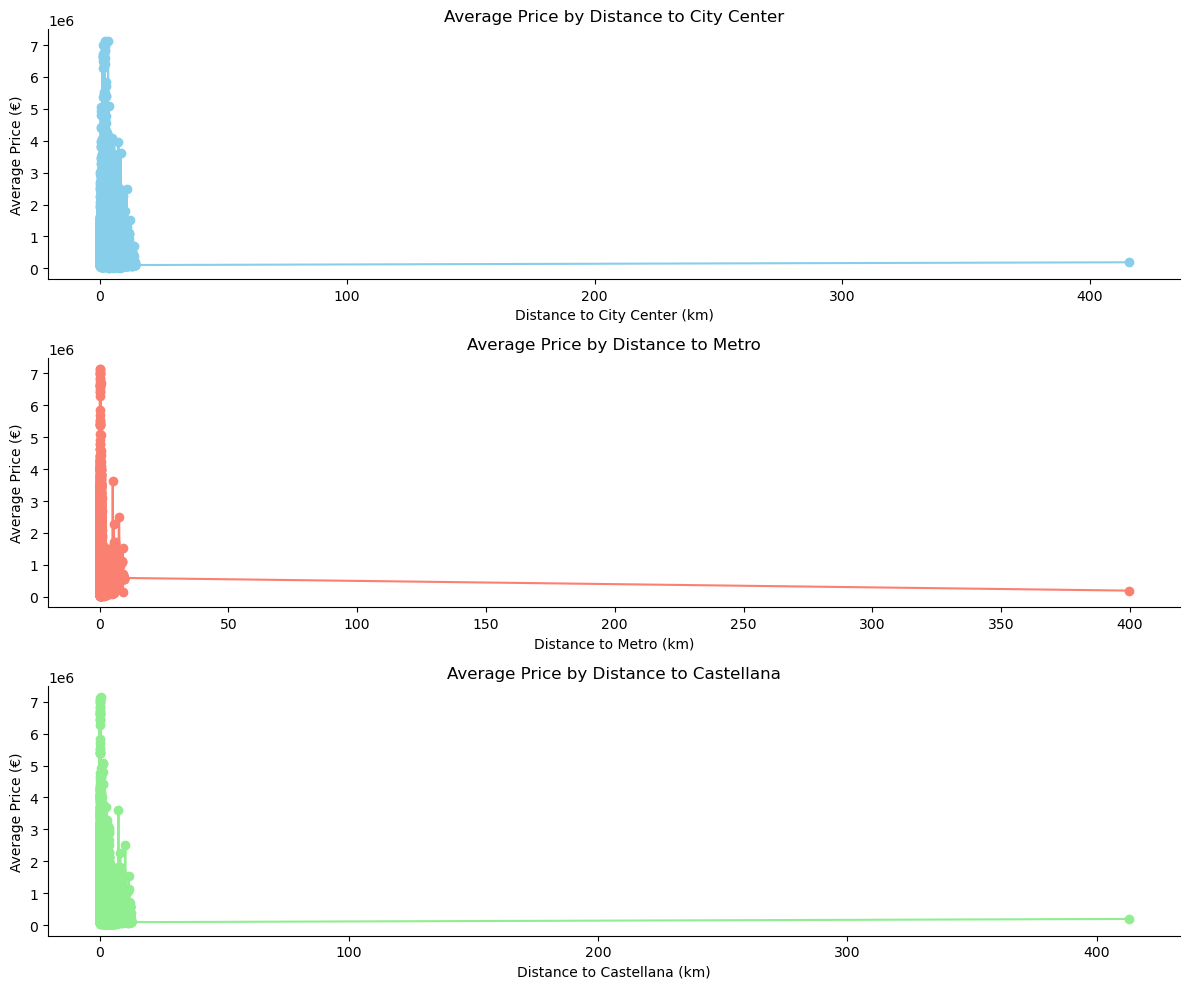

In [126]:
# Let's check how evolves the Price as a function of differents features

# Distance to City Center
distance_to_city_center = df_new3.groupby('DISTANCE_TO_CITY_CENTER')['PRICE'].mean()

# Distance to Metro
distance_to_metro = df_new3.groupby('DISTANCE_TO_METRO')['PRICE'].mean()

# Distance to Castellana
distance_to_castellana = df_new3.groupby('DISTANCE_TO_CASTELLANA')['PRICE'].mean()

# Create a figure and a grid of subplots (2 rows and 2 columns)
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# First subplot: Distance to City Center vs Price
axes[0].plot(distance_to_city_center.index, distance_to_city_center.values, marker='o', color='skyblue')
axes[0].set_title('Average Price by Distance to City Center')
axes[0].set_xlabel('Distance to City Center (km)')
axes[0].set_ylabel('Average Price (€)')
axes[0].spines['right'].set_visible(False)  # Hide the right spine
axes[0].spines['top'].set_visible(False)  # Hide the top spine

# Second subplot: Distance to Metro vs Price
axes[1].plot(distance_to_metro.index, distance_to_metro.values, marker='o', color='salmon')
axes[1].set_title('Average Price by Distance to Metro')
axes[1].set_xlabel('Distance to Metro (km)')
axes[1].set_ylabel('Average Price (€)')
axes[1].spines['right'].set_visible(False)  # Hide the right spine
axes[1].spines['top'].set_visible(False)  # Hide the top spine

# Third subplot: Size vs Price
axes[2].plot(distance_to_castellana.index, distance_to_castellana.values, marker='o', color='lightgreen')
axes[2].set_title('Average Price by Distance to Castellana')
axes[2].set_xlabel('Distance to Castellana (km)')
axes[2].set_ylabel('Average Price (€)')
axes[2].spines['right'].set_visible(False)  # Hide the right spine
axes[2].spines['top'].set_visible(False)  # Hide the top spine

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


In [114]:
# To better visualize the data we will remove the point with a distance to the metro, to the city center and castellana bigger than 20
df_distance = df_new3[(df_new3['DISTANCE_TO_METRO'] < 20) & (df_new3['DISTANCE_TO_CITY_CENTER'] < 20)]

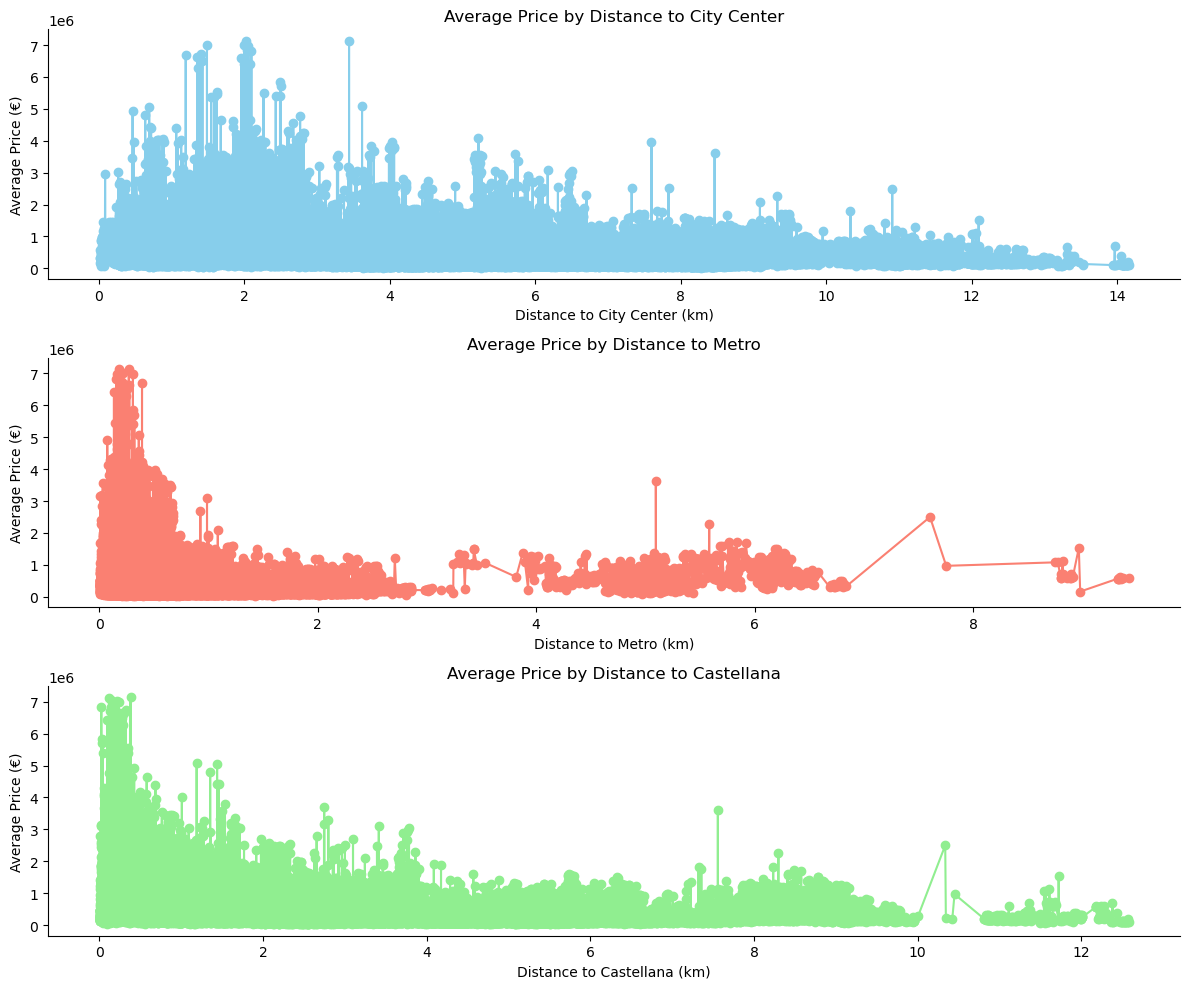

In [128]:
# Let's check how evolves the Price as a function of differents features

# Distance to City Center
distance_to_city_center = df_distance.groupby('DISTANCE_TO_CITY_CENTER')['PRICE'].mean()

# Distance to Metro
distance_to_metro = df_distance.groupby('DISTANCE_TO_METRO')['PRICE'].mean()

# Distance to Castellana
distance_to_castellana = df_distance.groupby('DISTANCE_TO_CASTELLANA')['PRICE'].mean()

# Create a figure and a grid of subplots (2 rows and 2 columns)
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# First subplot: Distance to City Center vs Price
axes[0].plot(distance_to_city_center.index, distance_to_city_center.values, marker='o', color='skyblue')
axes[0].set_title('Average Price by Distance to City Center')
axes[0].set_xlabel('Distance to City Center (km)')
axes[0].set_ylabel('Average Price (€)')
axes[0].spines['right'].set_visible(False)  # Hide the right spine
axes[0].spines['top'].set_visible(False)  # Hide the top spine

# Second subplot: Distance to Metro vs Price
axes[1].plot(distance_to_metro.index, distance_to_metro.values, marker='o', color='salmon')
axes[1].set_title('Average Price by Distance to Metro')
axes[1].set_xlabel('Distance to Metro (km)')
axes[1].set_ylabel('Average Price (€)')
axes[1].spines['right'].set_visible(False)  # Hide the right spine
axes[1].spines['top'].set_visible(False)  # Hide the top spine

# Third subplot: Size vs Price
axes[2].plot(distance_to_castellana.index, distance_to_castellana.values, marker='o', color='lightgreen')
axes[2].set_title('Average Price by Distance to Castellana')
axes[2].set_xlabel('Distance to Castellana (km)')
axes[2].set_ylabel('Average Price (€)')
axes[2].spines['right'].set_visible(False)  # Hide the right spine
axes[2].spines['top'].set_visible(False)  # Hide the top spine

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [122]:
# Make a copy of the dataframe cleaned
df_new4 = df_distance.copy()

In [124]:
# Group by 'FlOORCLEAN' or 'CADMAXBUILDINGFLOOR' and calculate the average price
avg_price_by_floor = df_new4.groupby('FLOORCLEAN')['PRICE'].mean()
avg_price_by_building = df_new4.groupby('CADMAXBUILDINGFLOOR')['PRICE'].mean()

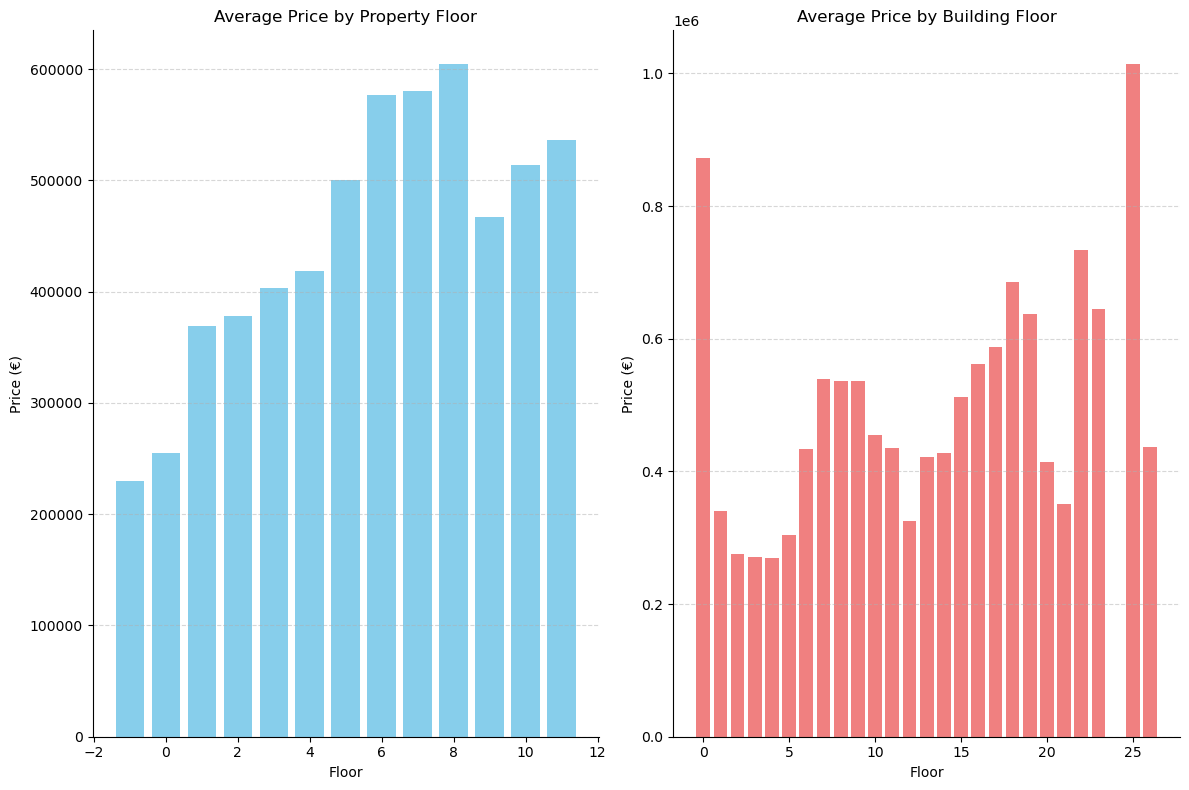

In [130]:
# Show the results
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Graph 1: Average price as a function of the property floor
axes[0].bar(avg_price_by_floor.index, avg_price_by_floor.values, color='skyblue')
axes[0].set_title('Average Price by Property Floor')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
# KEEP left spine visible
axes[0].grid(axis='y', linestyle='--', alpha=0.5)
axes[0].tick_params(left=True)
axes[0].set_ylabel('Price (€)')
axes[0].set_xlabel('Floor')


# Graph 2: Average price as a function of the height of the building
axes[1].bar(avg_price_by_building.index, avg_price_by_building.values, color='lightcoral')
axes[1].set_title('Average Price by Building Floor')
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].grid(axis='y', linestyle='--', alpha=0.5)
axes[1].tick_params(left=True)
axes[1].set_ylabel('Price (€)')
axes[1].set_xlabel('Floor')


plt.tight_layout()
plt.show()

In [142]:
# We will study how important is the 'PERIOD' column in our dataset. 
df_new4['PERIOD'].unique()

array([201803, 201809, 201812, 201806], dtype=int64)

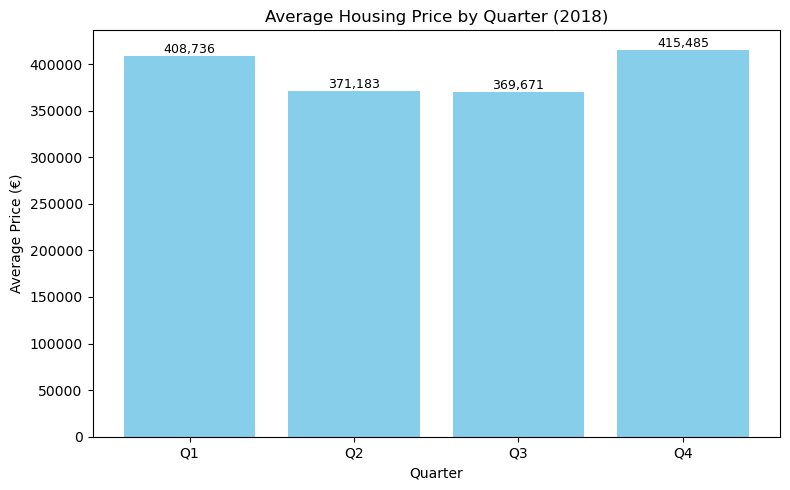

In [148]:
import matplotlib.pyplot as plt

# Filter data for year 2018
df_2018 = df_new4[df_new4['YEAR'] == 2018]

# Group by the quarter label and calculate average price
mean_prices_2018 = df_2018.groupby('QUARTER_LABEL')['PRICE'].mean().reindex(['Q1', 'Q2', 'Q3', 'Q4'])

# Create the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(mean_prices_2018.index, mean_prices_2018.values, color='skyblue')
plt.title('Average Housing Price by Quarter (2018)')
plt.xlabel('Quarter')
plt.ylabel('Average Price (€)')
plt.xticks(rotation=0)

# Add the value on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,.0f}',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [150]:
# Save the dataframe in a local machine to use it without compiling all the notebook
df_new4.to_csv(r'C:\Users\34651\Desktop\MASTER\TFM\Data\EDA_MADRID.csv', index=False)

,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,...,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,GEOMETRY,QUARTER,YEAR,QUARTER_LABEL,PERIOD_LABEL
0,201803,126000.0,2680.851064,47,1,1,0,1,1,3,...,8.058429,0.872075,6.868677,-3.766933,40.362485,c(-3.76693282740492 40.3624847687389),3,2018,Q1,2018 Q1
1,201803,235000.0,4351.851852,54,1,1,0,0,0,3,...,0.876369,0.116382,1.544125,-3.710725,40.422430,c(-3.71072465730388 40.4224298907482),3,2018,Q1,2018 Q1
2,201803,373000.0,4973.333333,75,2,1,0,0,1,3,...,0.907479,0.139109,1.608444,-3.711571,40.422190,c(-3.711570866261 40.4221904507903),3,2018,Q1,2018 Q1
3,201803,284000.0,5916.666667,48,1,1,0,1,1,3,...,0.845462,0.144299,1.516166,-3.710440,40.422251,c(-3.71043986942694 40.4222514604856),3,2018,Q1,2018 Q1
4,201803,498000.0,3921.259843,127,3,2,0,1,0,3,...,0.541773,0.161436,1.168126,-3.707522,40.412639,c(-3.70752185145011 40.4126386908556),3,2018,Q1,2018 Q1


In [175]:
# Read the data to continue analyzing 
df_new4 = pd.read_csv(r'C:\Users\34651\Desktop\MASTER\TFM\Data\EDA_MADRID.csv')
df_new4.head()

,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,...,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,GEOMETRY,QUARTER,YEAR,QUARTER_LABEL,PERIOD_LABEL
0,201803,126000.0,2680.851064,47,1,1,0,1,1,3,...,8.058429,0.872075,6.868677,-3.766933,40.362485,c(-3.76693282740492 40.3624847687389),3,2018,Q1,2018 Q1
1,201803,235000.0,4351.851852,54,1,1,0,0,0,3,...,0.876369,0.116382,1.544125,-3.710725,40.422430,c(-3.71072465730388 40.4224298907482),3,2018,Q1,2018 Q1
2,201803,373000.0,4973.333333,75,2,1,0,0,1,3,...,0.907479,0.139109,1.608444,-3.711571,40.422190,c(-3.711570866261 40.4221904507903),3,2018,Q1,2018 Q1
3,201803,284000.0,5916.666667,48,1,1,0,1,1,3,...,0.845462,0.144299,1.516166,-3.710440,40.422251,c(-3.71043986942694 40.4222514604856),3,2018,Q1,2018 Q1
4,201803,498000.0,3921.259843,127,3,2,0,1,0,3,...,0.541773,0.161436,1.168126,-3.707522,40.412639,c(-3.70752185145011 40.4126386908556),3,2018,Q1,2018 Q1


In [177]:
# Drop the 'GEOMETRY' column as it is not necessary because we have the 'LATITUDE' and 'LONGITUDE' column.
df_new5 = df_new4.drop('GEOMETRY', axis = 1)
df_new5

,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,...,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,QUARTER,YEAR,QUARTER_LABEL,PERIOD_LABEL
0,201803,126000.0,2680.851064,47,1,1,0,1,1,3,...,0,8.058429,0.872075,6.868677,-3.766933,40.362485,3,2018,Q1,2018 Q1
1,201803,235000.0,4351.851852,54,1,1,0,0,0,3,...,1,0.876369,0.116382,1.544125,-3.710725,40.422430,3,2018,Q1,2018 Q1
2,201803,373000.0,4973.333333,75,2,1,0,0,1,3,...,1,0.907479,0.139109,1.608444,-3.711571,40.422190,3,2018,Q1,2018 Q1
3,201803,284000.0,5916.666667,48,1,1,0,1,1,3,...,1,0.845462,0.144299,1.516166,-3.710440,40.422251,3,2018,Q1,2018 Q1
4,201803,498000.0,3921.259843,127,3,2,0,1,0,3,...,0,0.541773,0.161436,1.168126,-3.707522,40.412639,3,2018,Q1,2018 Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91995,201812,347000.0,3017.391304,115,3,2,1,1,1,3,...,1,10.003059,0.866826,8.276950,-3.592154,40.445810,12,2018,Q4,2018 Q4
91996,201812,311000.0,3344.086022,93,2,2,0,1,1,3,...,1,10.198147,1.019788,8.496364,-3.589376,40.445013,12,2018,Q4,2018 Q4
91997,201803,342000.0,2826.446281,121,2,2,1,1,1,2,...,1,11.204027,1.883650,9.573127,-3.576271,40.443196,3,2018,Q1,2018 Q1
91998,201806,146000.0,2354.838710,62,3,1,0,0,0,2,...,1,8.780692,0.171736,6.941217,-3.608694,40.447931,6,2018,Q2,2018 Q2


In [154]:
df_new5.nunique()

PERIOD                               4
PRICE                             2735
UNITPRICE                        30888
CONSTRUCTEDAREA                    548
ROOMNUMBER                          15
BATHNUMBER                           8
HASTERRACE                           2
HASLIFT                              2
HASAIRCONDITIONING                   2
AMENITYID                            3
ISPARKINGSPACEINCLUDEDINPRICE        2
PARKINGSPACEPRICE                  141
HASNORTHORIENTATION                  2
HASSOUTHORIENTATION                  2
HASEASTORIENTATION                   2
HASWESTORIENTATION                   2
HASBOXROOM                           2
HASWARDROBE                          2
HASSWIMMINGPOOL                      2
HASDOORMAN                           2
HASGARDEN                            2
ISDUPLEX                             2
ISSTUDIO                             2
ISINTOPFLOOR                         2
FLOORCLEAN                          13
CADCONSTRUCTIONYEAR      

In [179]:
df_new5.columns

Index(['PERIOD', 'PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA', 'ROOMNUMBER',
       'BATHNUMBER', 'HASTERRACE', 'HASLIFT', 'HASAIRCONDITIONING',
       'AMENITYID', 'ISPARKINGSPACEINCLUDEDINPRICE', 'PARKINGSPACEPRICE',
       'HASNORTHORIENTATION', 'HASSOUTHORIENTATION', 'HASEASTORIENTATION',
       'HASWESTORIENTATION', 'HASBOXROOM', 'HASWARDROBE', 'HASSWIMMINGPOOL',
       'HASDOORMAN', 'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR',
       'FLOORCLEAN', 'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR',
       'CADDWELLINGCOUNT', 'CADASTRALQUALITYID', 'BUILTTYPEID_1',
       'BUILTTYPEID_2', 'BUILTTYPEID_3', 'DISTANCE_TO_CITY_CENTER',
       'DISTANCE_TO_METRO', 'DISTANCE_TO_CASTELLANA', 'LONGITUDE', 'LATITUDE',
       'QUARTER', 'YEAR', 'QUARTER_LABEL', 'PERIOD_LABEL'],
      dtype='object')

### Transforming categorical features into numerical ones

In [181]:
# Define the categorical features
categorical_columns = ['PERIOD',
       'AMENITYID'
]

# Transform categorical features using dummy method
df_new5_dummies = pd.get_dummies(df_new5, columns = categorical_columns, dtype = int)

df_new5_dummies.head()

,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,ISPARKINGSPACEINCLUDEDINPRICE,PARKINGSPACEPRICE,...,YEAR,QUARTER_LABEL,PERIOD_LABEL,PERIOD_201803,PERIOD_201806,PERIOD_201809,PERIOD_201812,AMENITYID_1,AMENITYID_2,AMENITYID_3
0,126000.0,2680.851064,47,1,1,0,1,1,0,1,...,2018,Q1,2018 Q1,1,0,0,0,0,0,1
1,235000.0,4351.851852,54,1,1,0,0,0,0,1,...,2018,Q1,2018 Q1,1,0,0,0,0,0,1
2,373000.0,4973.333333,75,2,1,0,0,1,0,1,...,2018,Q1,2018 Q1,1,0,0,0,0,0,1
3,284000.0,5916.666667,48,1,1,0,1,1,0,1,...,2018,Q1,2018 Q1,1,0,0,0,0,0,1
4,498000.0,3921.259843,127,3,2,0,1,0,0,1,...,2018,Q1,2018 Q1,1,0,0,0,0,0,1


In [183]:
# Drop 'LONGITUDE' and 'LATITUDE' columns
df_new5_dummies_scaled = df_new5_dummies.drop(['LONGITUDE', 'LATITUDE'], axis = 1)

### Scaling the dataset

In [186]:
# Define the scaler
scaler = StandardScaler()

# Normalize only continous features. The target feature (Price or UnitPrice) will not be scaled
continuous_columns = ['CONSTRUCTEDAREA', 'PARKINGSPACEPRICE', 'CADCONSTRUCTIONYEAR', 'CADDWELLINGCOUNT',
       'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO', 'DISTANCE_TO_CASTELLANA', 'ROOMNUMBER',
       'BATHNUMBER', 'FLOORCLEAN', 'CADMAXBUILDINGFLOOR']

df_new5_dummies_scaled[continuous_columns] = scaler.fit_transform(df_new5_dummies_scaled[continuous_columns])
df_new5_dummies_scaled[continuous_columns]

,CONSTRUCTEDAREA,PARKINGSPACEPRICE,CADCONSTRUCTIONYEAR,CADDWELLINGCOUNT,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,ROOMNUMBER,BATHNUMBER,FLOORCLEAN,CADMAXBUILDINGFLOOR
0,-0.836092,-0.094618,1.359839,5.129005,1.327623,0.635953,1.883759,-1.479556,-0.72842,-0.799103,0.213292
1,-0.730710,-0.094618,-2.284694,-0.521302,-1.361398,-0.589805,-0.520219,-1.479556,-0.72842,-0.799103,-0.488526
2,-0.414566,-0.094618,-1.764047,-0.246125,-1.349750,-0.552941,-0.491179,-0.583463,-0.72842,0.101069,-0.137617
3,-0.821037,-0.094618,-0.653332,-0.447921,-1.372969,-0.544523,-0.532842,-1.479556,-0.72842,-0.799103,0.915110
4,0.368268,-0.094618,-2.284694,-0.392886,-1.486673,-0.516725,-0.689978,0.312629,0.49689,0.101069,-0.488526
...,...,...,...,...,...,...,...,...,...,...,...
91995,0.187614,-0.094618,1.498678,0.340920,2.055708,0.627441,2.519579,0.312629,0.49689,-0.799103,0.213292
91996,-0.143585,-0.094618,1.429258,2.230471,2.128750,0.875550,2.618642,-0.583463,0.49689,-0.349017,0.213292
91997,0.277941,-0.094618,1.498678,1.239833,2.505360,2.276762,3.104789,-0.583463,0.49689,0.101069,-0.137617
91998,-0.610274,-0.094618,0.144994,-0.411231,1.598044,-0.500019,1.916510,0.312629,-0.72842,0.101069,-0.839435


In [188]:
# Final Dataframe with all columns transformed into numercial ones excepts the prices columns.
df_new5_dummies_scaled.head()

,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,ISPARKINGSPACEINCLUDEDINPRICE,PARKINGSPACEPRICE,...,YEAR,QUARTER_LABEL,PERIOD_LABEL,PERIOD_201803,PERIOD_201806,PERIOD_201809,PERIOD_201812,AMENITYID_1,AMENITYID_2,AMENITYID_3
0,126000.0,2680.851064,-0.836092,-1.479556,-0.72842,0,1,1,0,-0.094618,...,2018,Q1,2018 Q1,1,0,0,0,0,0,1
1,235000.0,4351.851852,-0.730710,-1.479556,-0.72842,0,0,0,0,-0.094618,...,2018,Q1,2018 Q1,1,0,0,0,0,0,1
2,373000.0,4973.333333,-0.414566,-0.583463,-0.72842,0,0,1,0,-0.094618,...,2018,Q1,2018 Q1,1,0,0,0,0,0,1
3,284000.0,5916.666667,-0.821037,-1.479556,-0.72842,0,1,1,0,-0.094618,...,2018,Q1,2018 Q1,1,0,0,0,0,0,1
4,498000.0,3921.259843,0.368268,0.312629,0.49689,0,1,0,0,-0.094618,...,2018,Q1,2018 Q1,1,0,0,0,0,0,1


In [190]:
# Save the dataframe in a local machine
df_new5_dummies_scaled.to_csv(r'C:\Users\34651\Desktop\MASTER\TFM\Data\EDA_MADRID_SCALED.csv',
                              index=False)

In [25]:
df = pd.read_csv(r'C:\Users\34651\Desktop\MASTER\TFM\idealista18\Madrid_Pois.csv')
df

,Lon,Lat
0,-3.703790,40.416590
1,-3.645225,40.389769
2,-3.703318,40.450331
3,-3.699376,40.412463
4,-3.692491,40.408847
...,...,...
391,-3.694897,40.392272
392,-3.694941,40.391827
393,-3.694977,40.391519
394,-3.695031,40.391191


In [35]:
!pip install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.2 MB 2.8 MB/s eta 0:00:06
   --- ------------------------------------ 1.3/16.2 MB 3.4 MB/s eta 0:00:05
   ---- ----------------------------------- 1.8/16.2 MB 3.5 MB/s eta 0:00:05
   ------ --------------------------------- 2.6/16.2 MB 3.2 MB/s eta 0:00:05
   -------- ------------------------------- 3.4/16.2 MB 3.5 MB/s eta 0:00:04
   ----------- ---------------------------- 4.5/16.2 MB 3.7 MB/s eta 0:00:04
   ------------ --------------------------- 5.2/16.2 MB 3.8 MB/s eta 0:00:03
   -------------- ------------------------- 6.0/16.2 MB 3.7 MB/s eta 0:00:03
   ----------------- ---------------------- 7.1/16.2 MB 3.9 MB/s eta 0:00:03
   -------------------- ------------------- 8.1/16.2 MB 4.0 MB/s eta 0:00:02
   ----------------------- ---------------- 9.4/16.2 MB 4.1 MB/s eta 0:00:02
   ------------------------- -------------- 10.2/16.2 MB 4.1 MB/s eta 0:00:02
   --

In [37]:
import geopandas as gpd

In [39]:
# Cargar el archivo GeoJSON
gdf = gpd.read_file(r'C:\Users\34651\Desktop\MASTER\TFM\idealista18\Madrid_Polygons.geojson')

# Ver las primeras filas de los datos
print(gdf.head())

                     LOCATIONID         LOCATIONNAME  ZONELEVELID  \
0  0-EU-ES-28-07-001-079-16-002  Conde Orgaz-Piovera            8   
1  0-EU-ES-28-07-001-079-16-004        Pinar del Rey            8   
2  0-EU-ES-28-07-001-079-21-004                Timón            8   
3  0-EU-ES-28-07-001-079-01-001              Palacio            8   
4  0-EU-ES-28-07-001-079-01-003       Huertas-Cortes            8   

                                            geometry  
0  MULTIPOLYGON (((-3.63014 40.44939, -3.62633 40...  
1  MULTIPOLYGON (((-3.6551 40.46681, -3.65425 40....  
2  MULTIPOLYGON (((-3.58174 40.47972, -3.60157 40...  
3  MULTIPOLYGON (((-3.72044 40.42028, -3.72097 40...  
4  MULTIPOLYGON (((-3.69649 40.41881, -3.69968 40...  


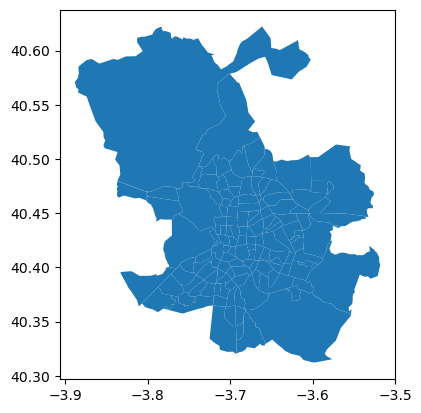

In [49]:
gdf.plot()
plt.show()